# ECE 143 Data Visualizations

## Evaluation of Predictors

### Setup

In [ ]:
import EDA
import ErrorAnalysis as EA
import linear_regression as LR
import polynomial_regression as PR
import gradient_boosting as GB
import random_forest as RF
import pandas as pd
import numpy as np

all_data = EDA.load_cleaned_data()

### Evaluation Routine

In [ ]:
import pandas as pd
import numpy as np

def evaluate_cluster(data: pd.DataFrame, cluster: str, group_name: str):
    if cluster is not None:
        df = EDA.get_genre_subset(data, cluster)
    else:
        df = data

    print(f'Cluster: {group_name}')
    pearson, spearman = EDA.report_correlation(df, 'popularity')

    results = []
    top_features_map = {}  # Store top 10 features for each correlation type

    models = [
        ("Linear Regression", LR.run_linear_regression),
        ("Polynomial Regression", PR.find_optimal_poly_regression),
        ("Random Forest", RF.run_random_forest),
        ("Gradient Boosting", GB.run_gradient_boosting_cpu)
    ]

    for correlation_name, correlation in [("Pearson", pearson), ("Spearman", spearman)]:
        print(f'Evaluating with {correlation_name} correlation')

        top_10_features = EDA.plot_top_ten_features(correlation, f'{correlation_name} Popularity')
        top_features_map[correlation_name] = top_10_features  # Store features per correlation type

        remaining_features = df.select_dtypes(include=[np.number]).columns.difference(top_10_features + ['popularity']) # Select only numerical columns
        random_10_features = np.random.choice(remaining_features.tolist(), 10, replace=False).tolist()

        for feature_set_name, features in [("Top 10", top_10_features), ("Random 10", random_10_features)]:
            print(f'Using {feature_set_name} features')
            for model_name, model_func in models:
                model, y_test, y_pred = model_func(df, features, 'popularity')

                r2 = EA.r2_score(y_test, y_pred)
                rmse = EA.root_mean_squared_error(y_test, y_pred)

                results.append({
                    "Cluster": group_name,
                    "Correlation": correlation_name,
                    "Feature Set": feature_set_name,
                    "Model": model_name,
                    "R2": r2,
                    "RMSE": rmse
                })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Find the best-performing combination (highest R2)
    best_combination = results_df.loc[results_df['R2'].idxmax()]
    best_model_name = best_combination["Model"]
    best_correlation = best_combination["Correlation"]
    best_feature_set = best_combination["Feature Set"]

    print(f"Generating graphics for {best_model_name} with {best_correlation} correlation ({best_feature_set} features)")

    # Retrieve the correct function for the best model
    best_model_func = dict(models)[best_model_name]

    # Use the correct top 10 features that led to the best performance
    feature_set = top_features_map[best_correlation]

    # Run the best model again and generate graphics
    model, y_test, y_pred = best_model_func(df, feature_set, 'popularity')
    EA.generate_slide_graphics(y_test, y_pred, f"{best_model_name} with {best_correlation} Correlation ({best_feature_set})")

    return results_df

### All Genres

Cluster: All Songs
Evaluating with Pearson correlation
Top 10 Features for Pearson Popularity Correlation:
entropy_energy       0.275831
danceability         0.215479
MFCC_1               0.207961
loudness             0.205950
MEL_2                0.195601
MFCC_6               0.194563
duration_ms          0.171191
MEL_3                0.169636
spectral_bandwith    0.163436
MEL_1                0.161444
dtype: float64


C:\Users\Owner\Documents\UCSD\143-Proj\ece143_project\EDA.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


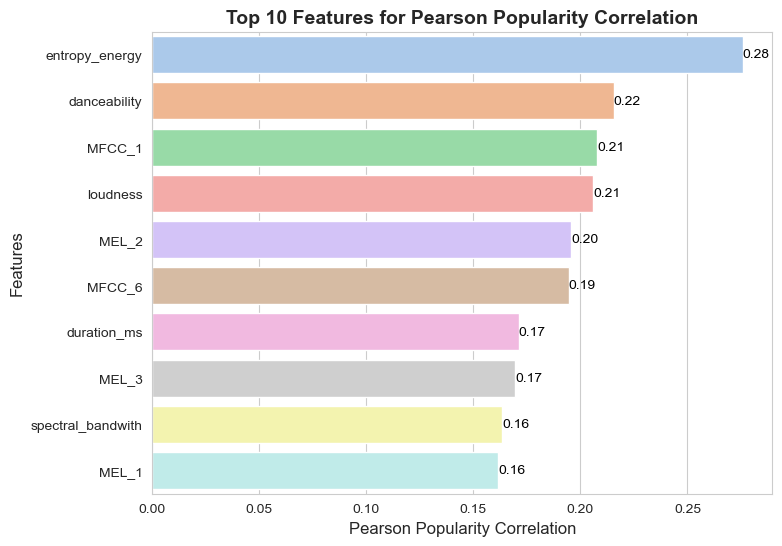

       RMSE:      R2:
0  14.765516  0.10555


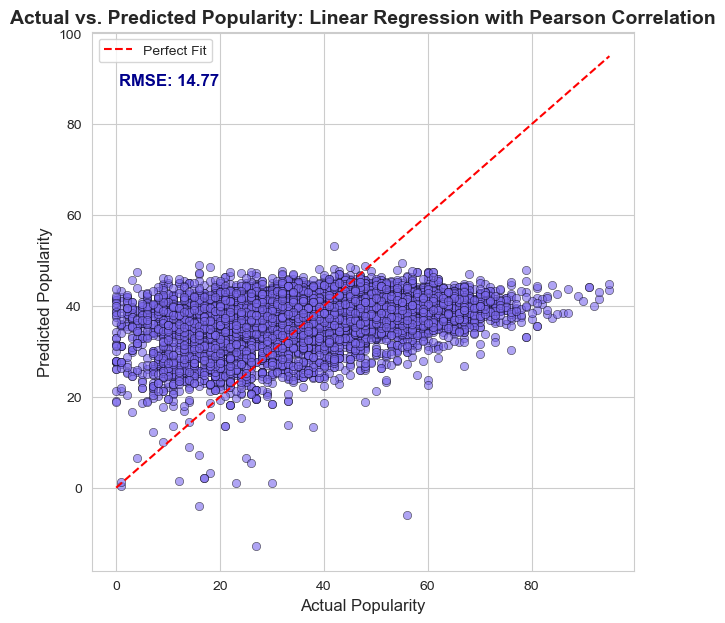

       RMSE:       R2:
0  14.539753  0.132693


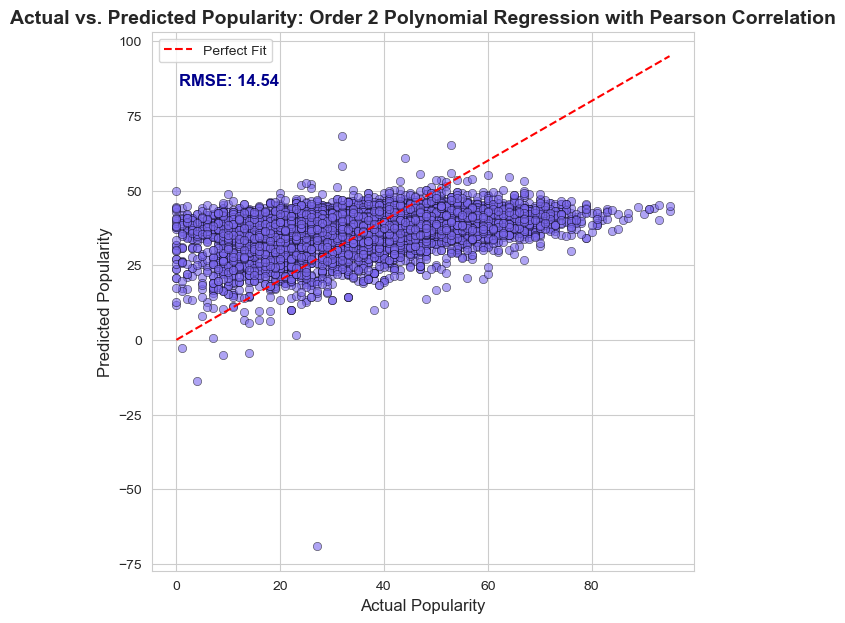

      RMSE:       R2:
0  12.29902  0.379417


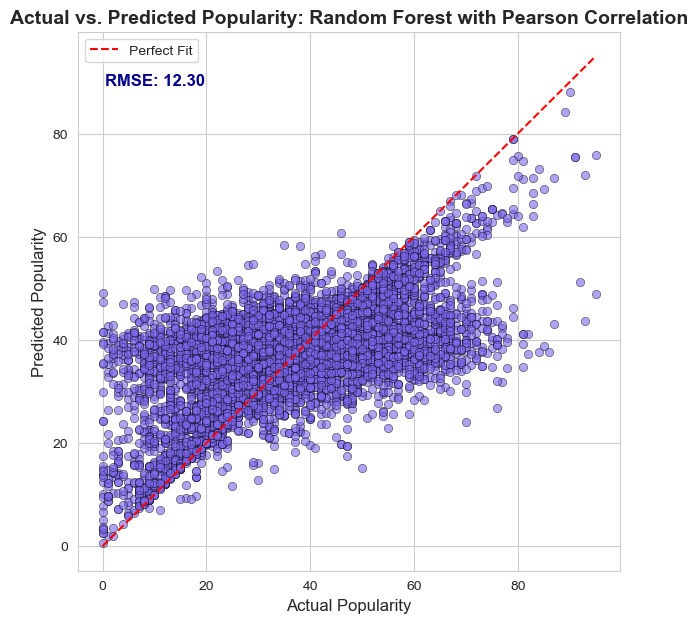

Evaluating with Spearman correlation
Top 10 Features for Spearman Popularity Correlation:
entropy_energy    0.262842
MEL_127           0.260529
MEL_126           0.260395
MEL_128           0.260376
MEL_125           0.260242
MEL_123           0.259994
MEL_124           0.259798
MEL_122           0.259612
MEL_120           0.259334
MEL_121           0.259233
dtype: float64


C:\Users\Owner\Documents\UCSD\143-Proj\ece143_project\EDA.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


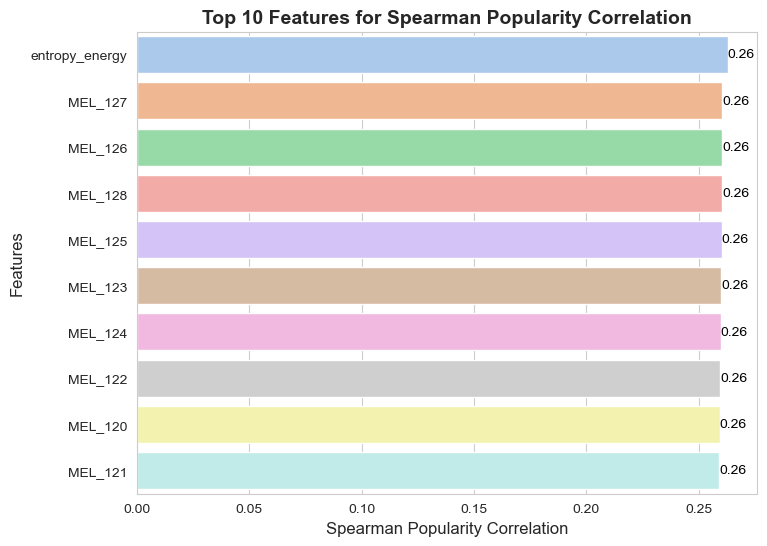

       RMSE:      R2:
0  14.998017  0.07716


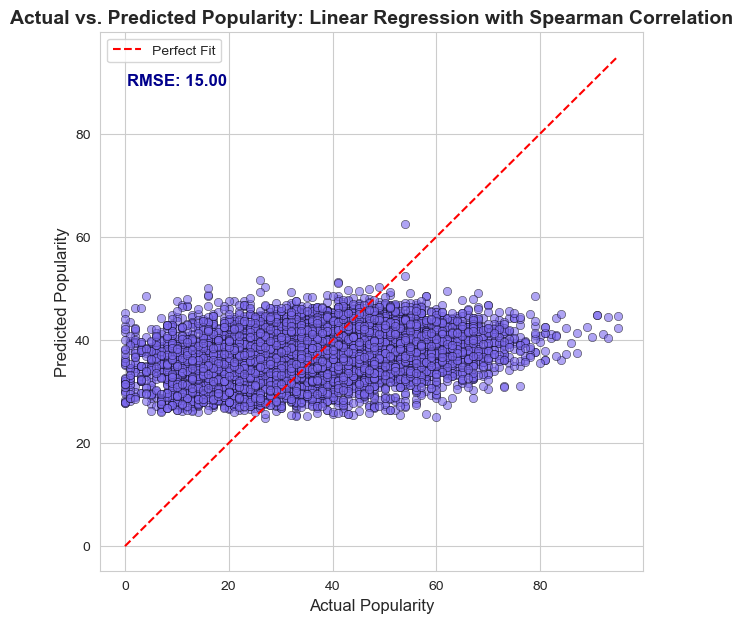

       RMSE:       R2:
0  14.945841  0.083569


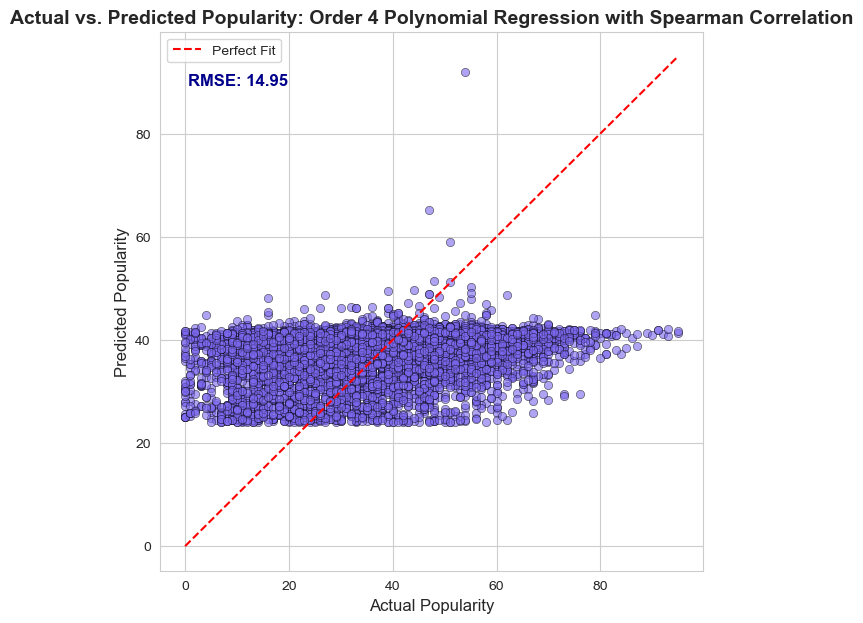

      RMSE:       R2:
0  13.22741  0.282192


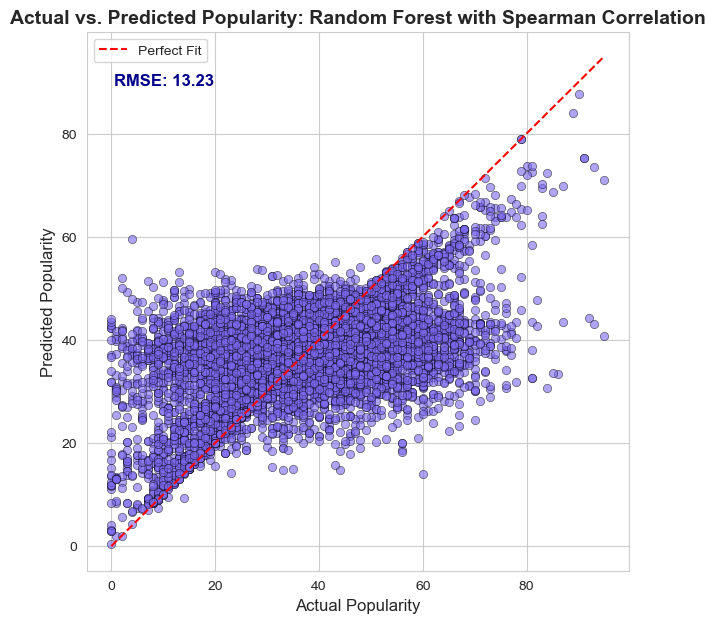

In [3]:
evaluate_cluster(all_data, None, 'All Songs')

### Pop Music

Cluster: Pop Songs
Evaluating with Pearson correlation
Top 10 Features for Pearson Popularity Correlation:
entropy_energy       0.174422
MEL_2                0.152603
MEL_1                0.148709
MEL_105              0.148003
MFCC_2               0.147227
MEL_106              0.146655
MEL_108              0.145457
loudness             0.145392
MEL_101              0.145138
spectral_bandwith    0.144590
dtype: float64


C:\Users\Owner\Documents\UCSD\143-Proj\ece143_project\EDA.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


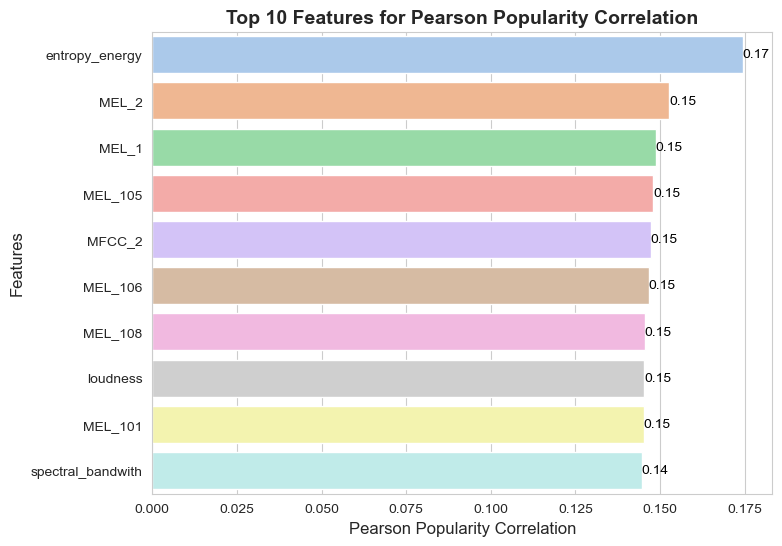

      RMSE:       R2:
0  14.89236  0.027222


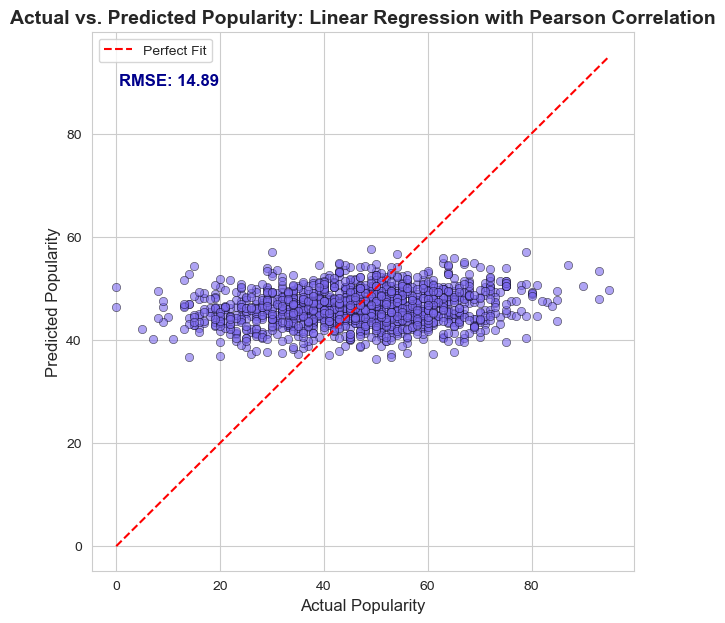

       RMSE:       R2:
0  14.979758  0.015771


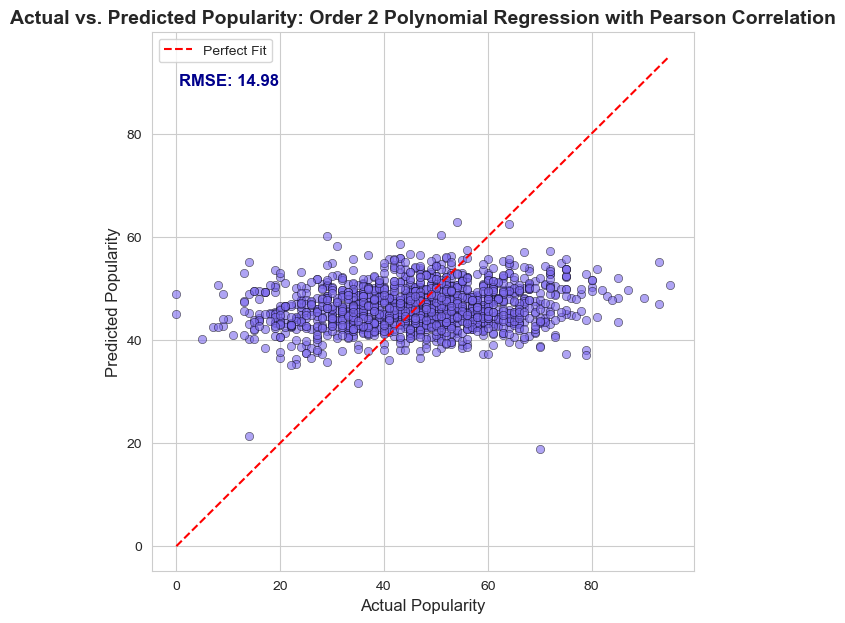

       RMSE:       R2:
0  14.368522  0.094453


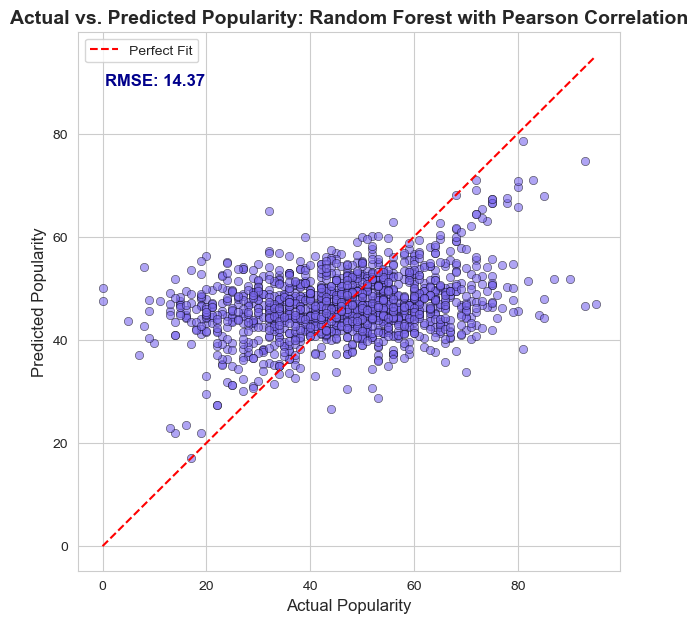

Evaluating with Spearman correlation
Top 10 Features for Spearman Popularity Correlation:
MEL_128    0.203696
MEL_125    0.203378
MEL_126    0.203353
MEL_127    0.203256
MEL_123    0.203097
MEL_124    0.202566
MEL_122    0.202538
MEL_121    0.201846
MEL_120    0.201824
MEL_119    0.201142
dtype: float64


C:\Users\Owner\Documents\UCSD\143-Proj\ece143_project\EDA.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


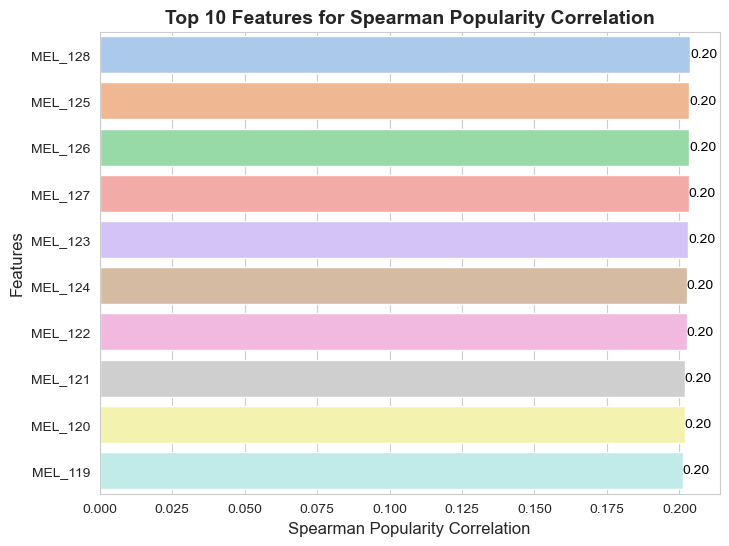

       RMSE:       R2:
0  15.242806 -0.019099


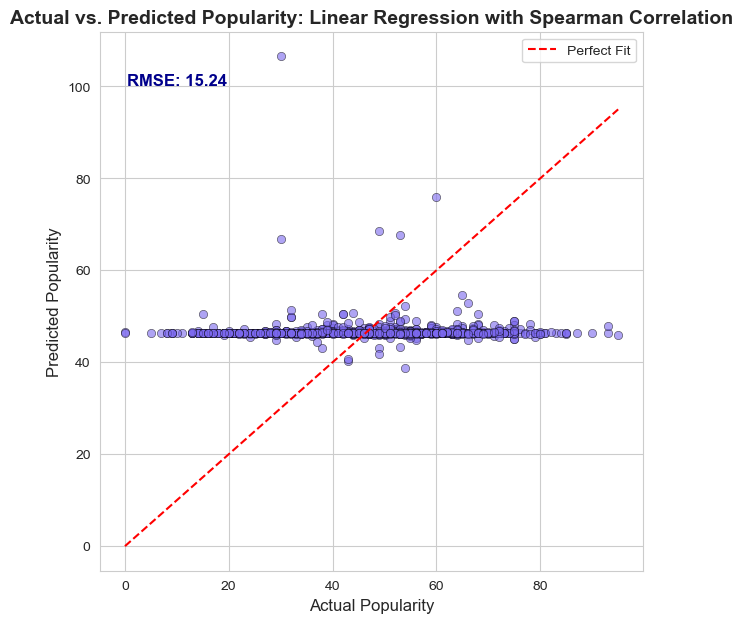

       RMSE:        R2:
0  52.363579 -11.026666


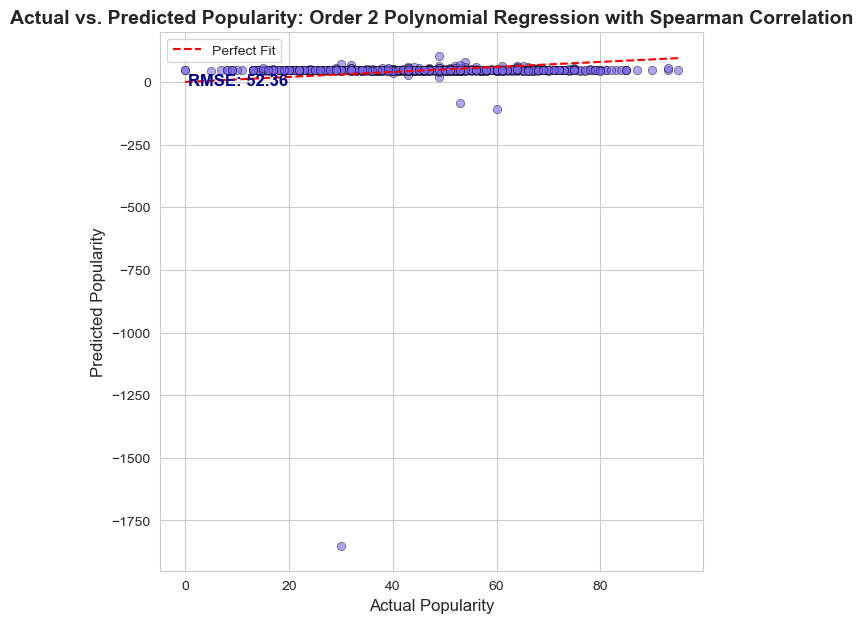

       RMSE:       R2:
0  14.970153  0.017033


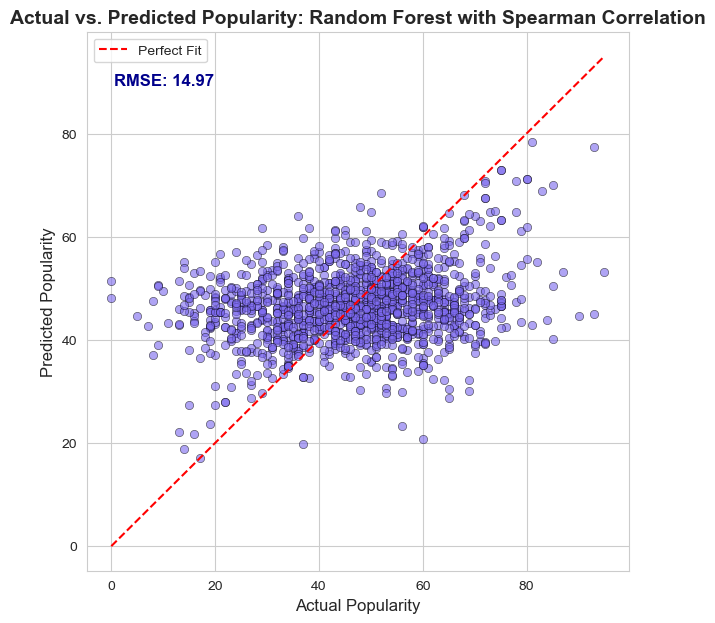

In [4]:
evaluate_cluster(all_data, 'pop', 'Pop Songs')

### Hip Hop Music

Cluster: Hip Hop Songs
Evaluating with Pearson correlation
Top 10 Features for Pearson Popularity Correlation:
loudness          0.166181
n_sentences       0.157439
entropy_energy    0.154889
MEL_2             0.144567
MEL_44            0.138467
MEL_1             0.138243
MEL_45            0.137200
MEL_40            0.133394
MEL_46            0.131328
MEL_39            0.129718
dtype: float64


C:\Users\Owner\Documents\UCSD\143-Proj\ece143_project\EDA.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


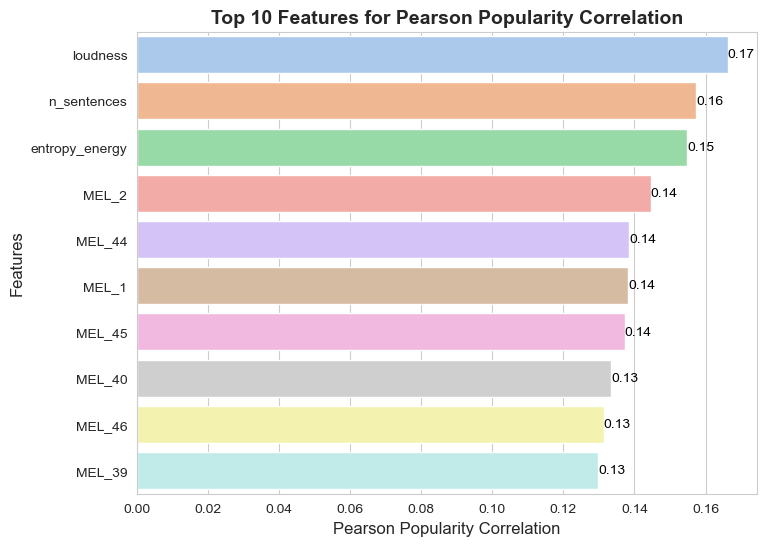

       RMSE:       R2:
0  14.385054  0.096177


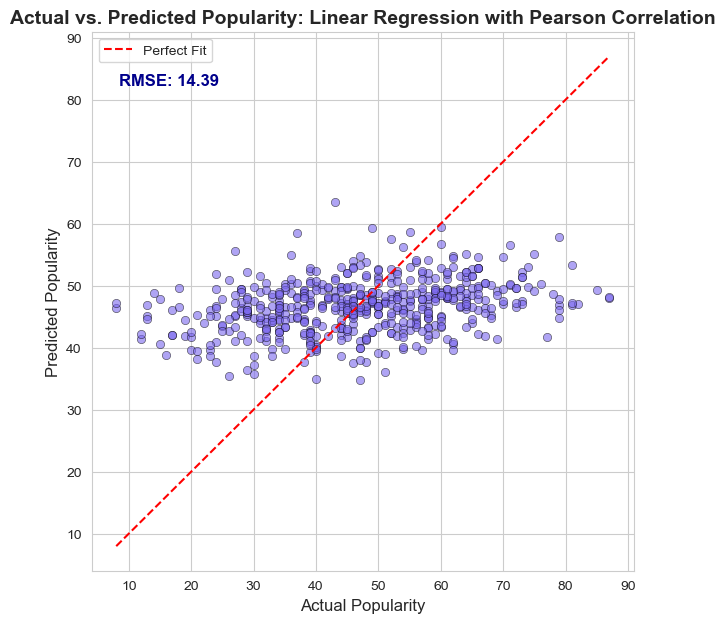

       RMSE:       R2:
0  14.438104  0.089498


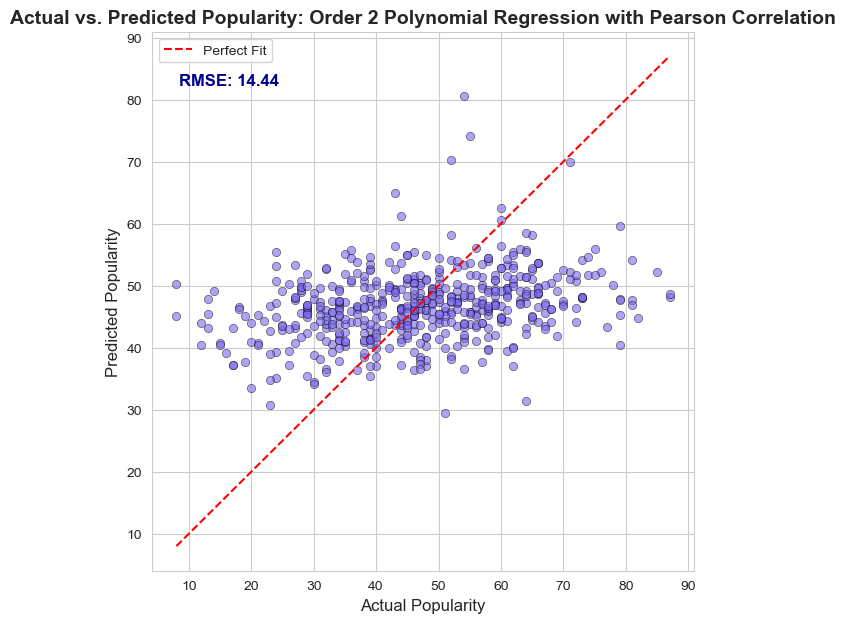

       RMSE:       R2:
0  13.615722  0.190267


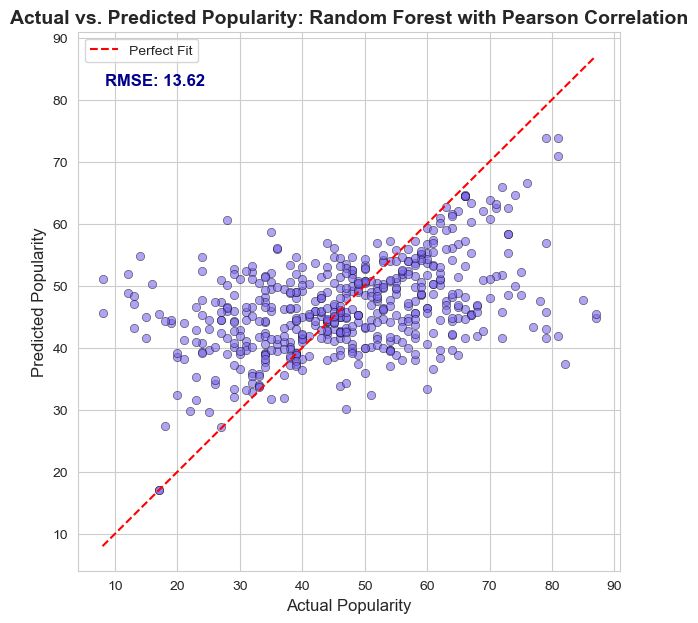

Evaluating with Spearman correlation
Top 10 Features for Spearman Popularity Correlation:
MEL_120    0.250229
MEL_119    0.249608
MEL_121    0.248705
MEL_122    0.248428
MEL_123    0.247718
MEL_127    0.247638
MEL_126    0.247174
MEL_125    0.246615
MEL_128    0.246367
MEL_124    0.246155
dtype: float64


C:\Users\Owner\Documents\UCSD\143-Proj\ece143_project\EDA.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


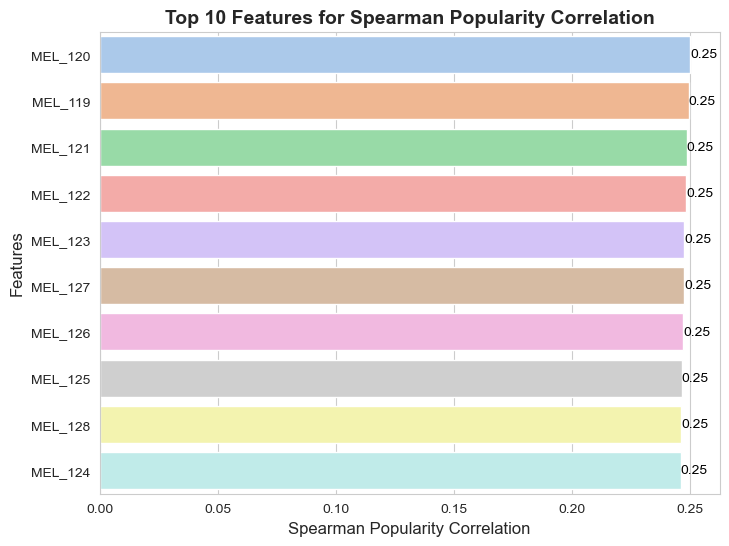

      RMSE:       R2:
0  15.18102 -0.006613


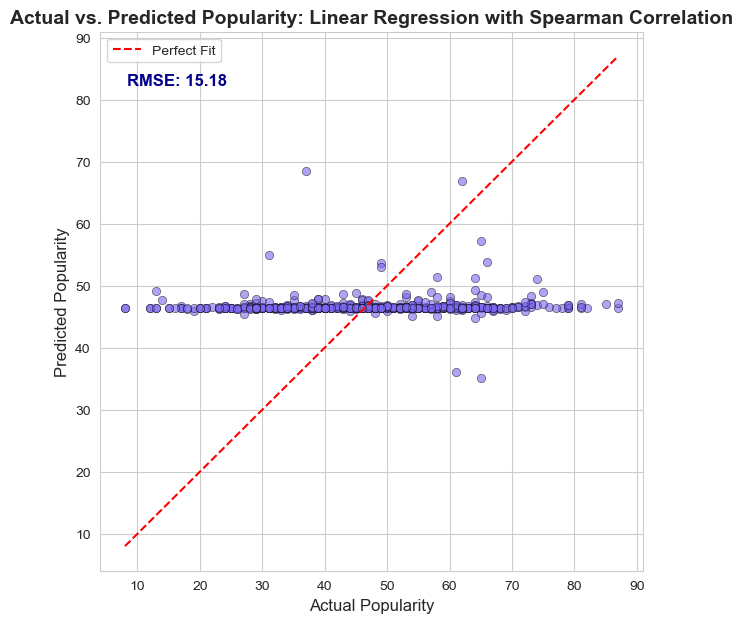

       RMSE:       R2:
0  18.589073 -0.509302


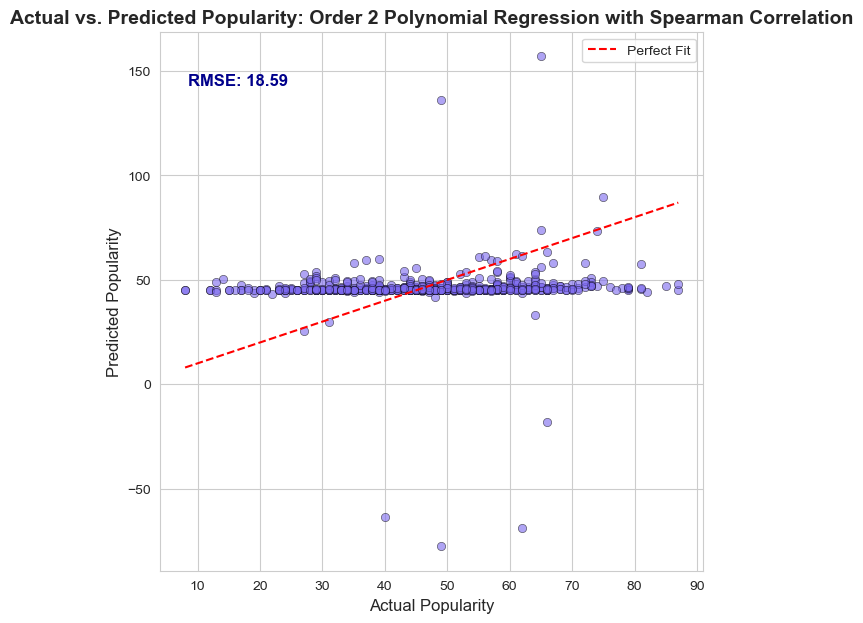

       RMSE:       R2:
0  13.666039  0.184271


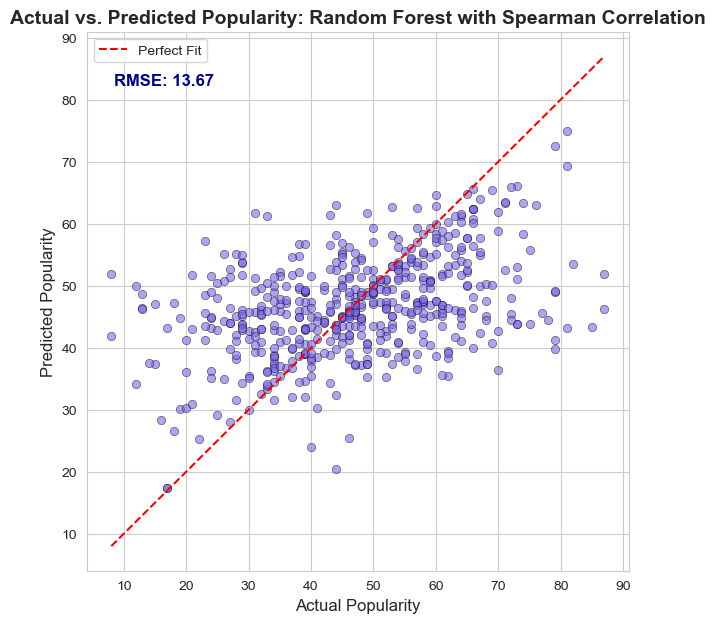

In [5]:
evaluate_cluster(all_data, 'hip hop', 'Hip Hop Songs')

### Rock Music

Cluster: Rock Songs
Evaluating with Pearson correlation
Top 10 Features for Pearson Popularity Correlation:
instrumentalness       0.133592
danceability           0.123408
sentence_similarity    0.112992
norm_anticipation      0.095607
MEL_108                0.093674
entropy_energy         0.091793
Spectral_contrast_3    0.090448
vocabulary_wealth      0.087852
Spectral_contrast_4    0.087622
norm_trust             0.084560
dtype: float64


C:\Users\Owner\Documents\UCSD\143-Proj\ece143_project\EDA.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


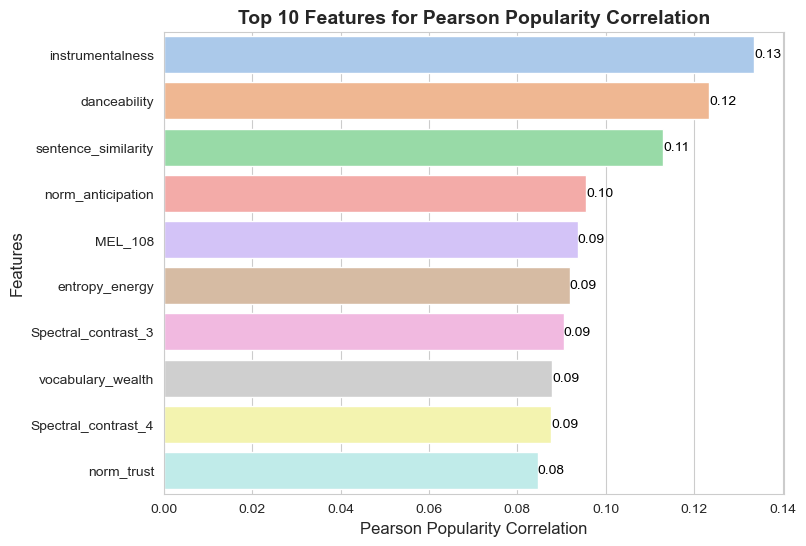

       RMSE:       R2:
0  15.005286  0.031426


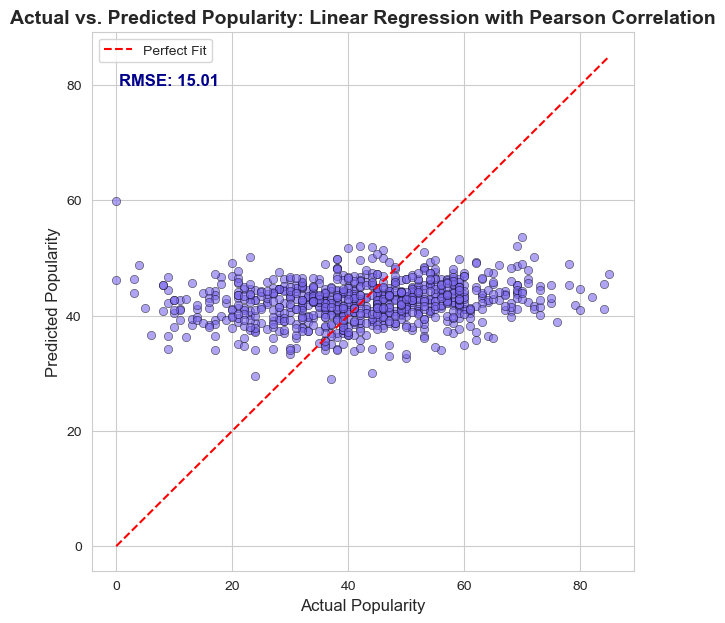

       RMSE:      R2:
0  14.941135  0.03969


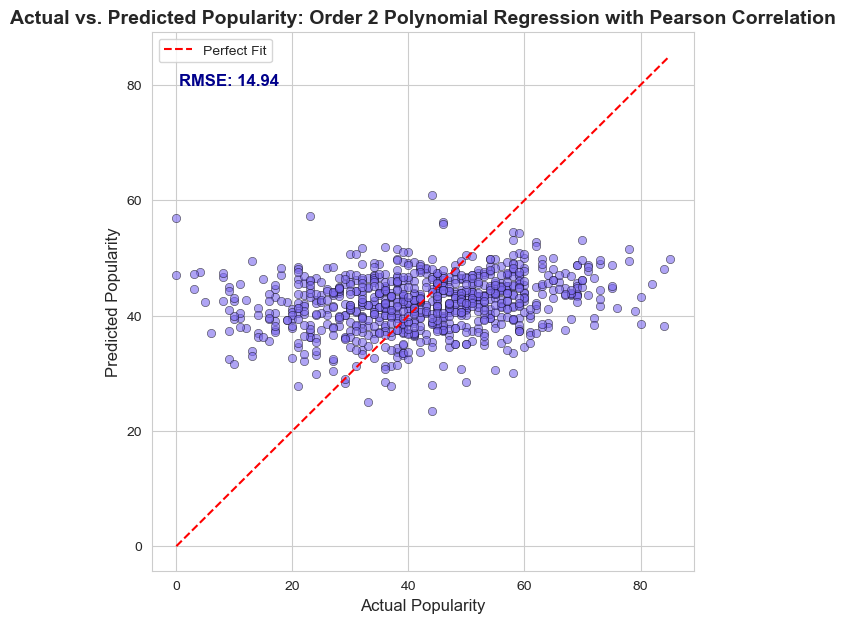

       RMSE:       R2:
0  14.682512  0.072647


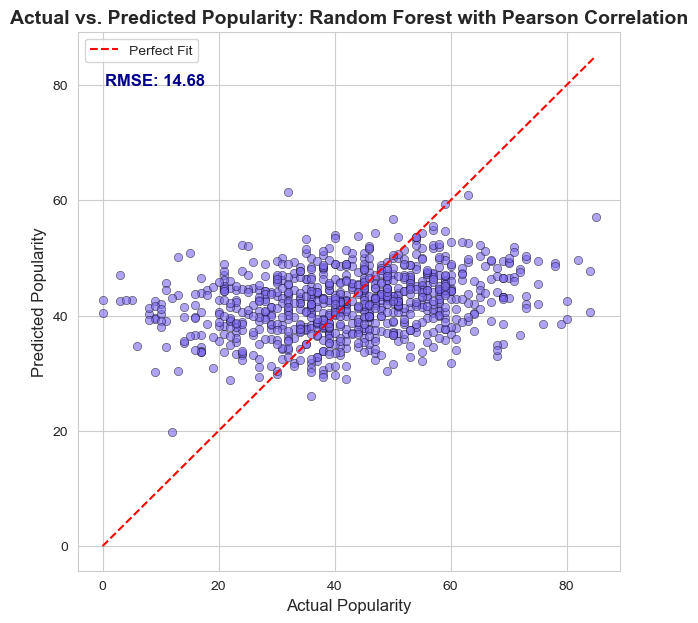

Evaluating with Spearman correlation
Top 10 Features for Spearman Popularity Correlation:
n_words             0.203835
n_sentences         0.192235
instrumentalness    0.186309
anticipation        0.159614
trust               0.156066
joy                 0.154489
positive            0.154025
sadness             0.142764
negative            0.141229
fear                0.138503
dtype: float64


C:\Users\Owner\Documents\UCSD\143-Proj\ece143_project\EDA.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


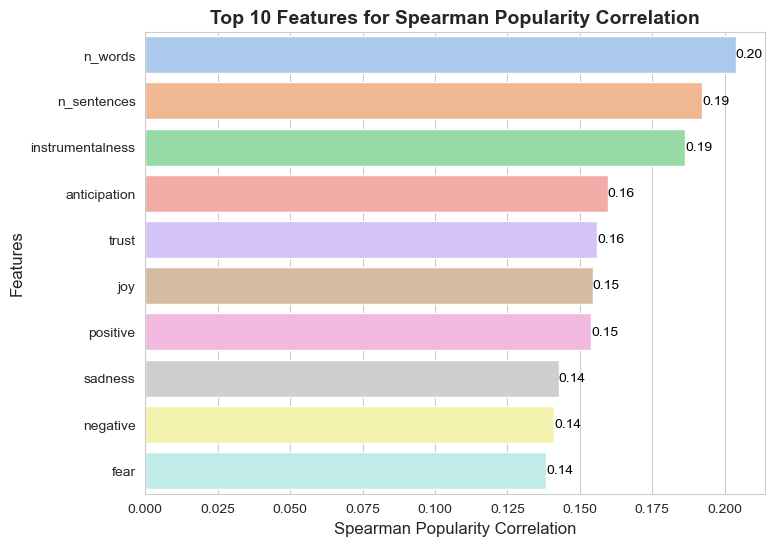

       RMSE:       R2:
0  15.884635 -0.085423


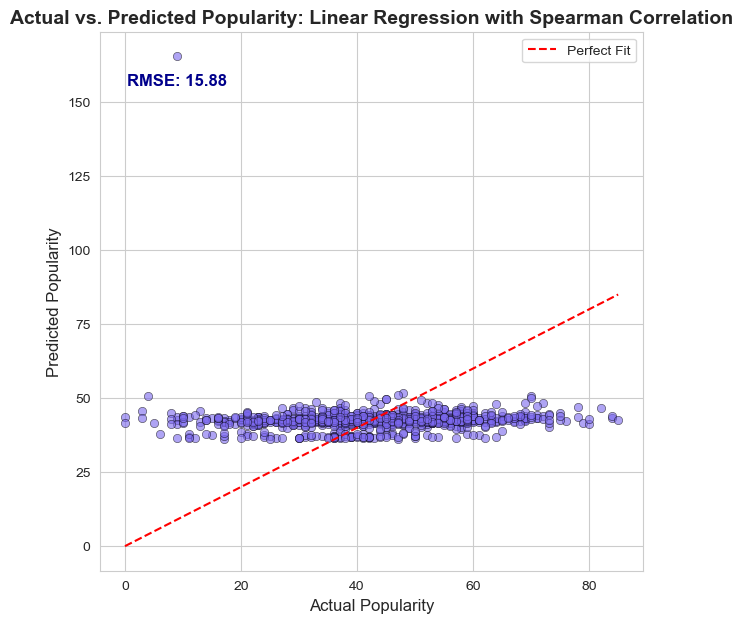

        RMSE:        R2:
0  128.916781 -70.492961


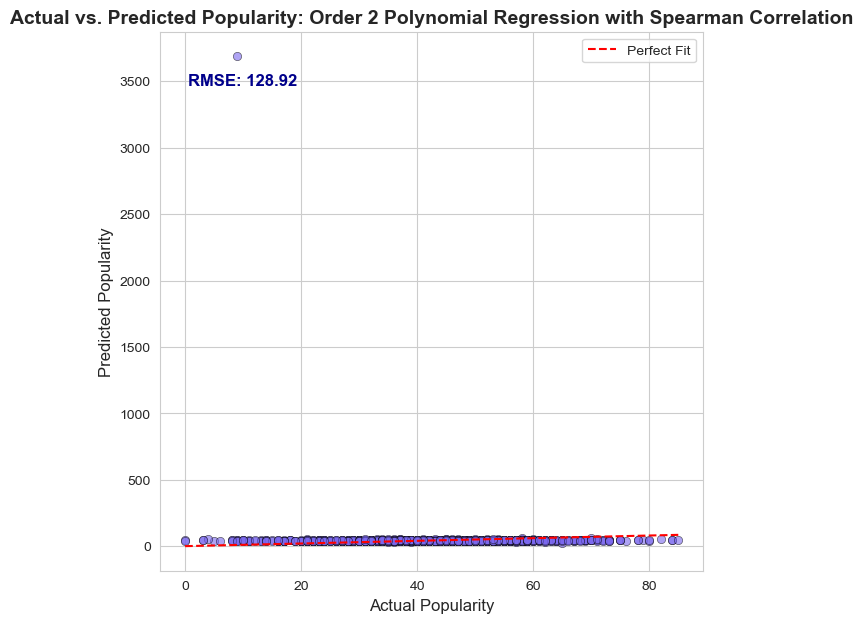

       RMSE:       R2:
0  14.533515  0.091373


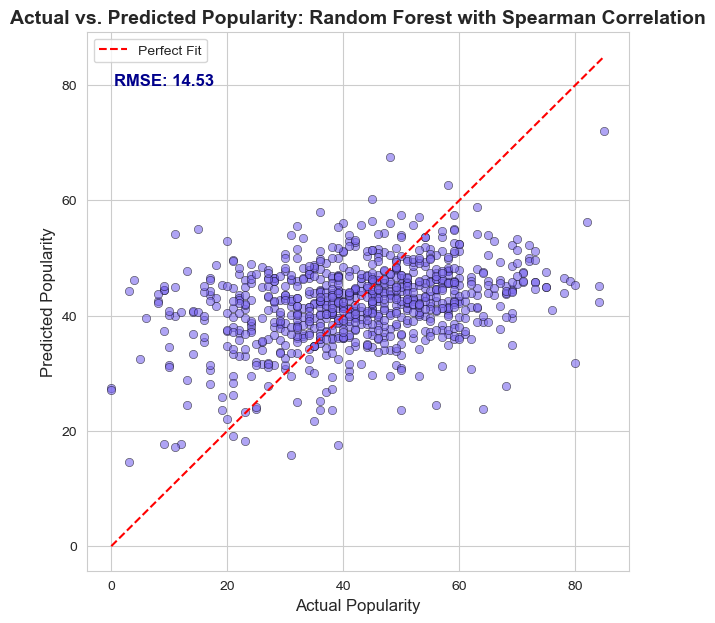

In [6]:
evaluate_cluster(all_data, 'rock', 'Rock Songs')

### Country Music

Cluster: Country Songs
Evaluating with Pearson correlation
Top 10 Features for Pearson Popularity Correlation:
positive               0.228508
n_sentences            0.197470
n_words                0.194641
MEL_86                 0.185515
Spectral_contrast_4    0.182482
MEL_88                 0.181591
MEL_84                 0.175891
MEL_87                 0.174987
MEL_85                 0.173287
MEL_73                 0.172532
dtype: float64


C:\Users\Owner\Documents\UCSD\143-Proj\ece143_project\EDA.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


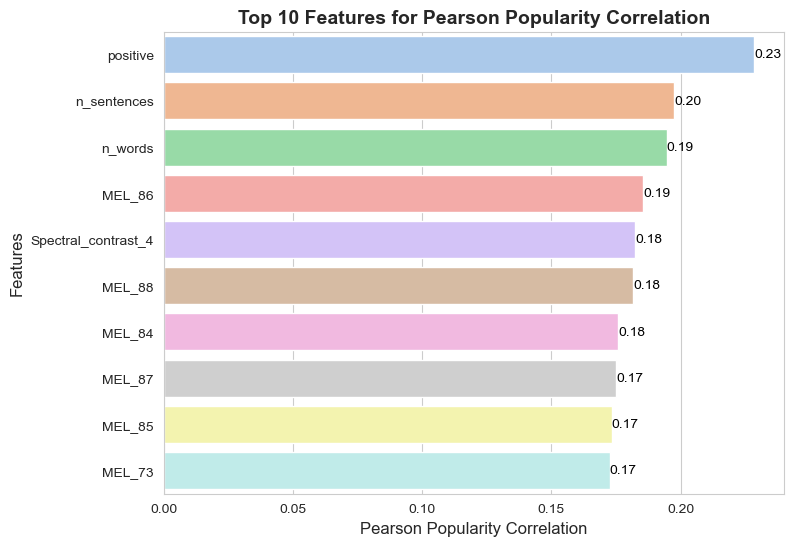

       RMSE:      R2:
0  14.976181  0.06936


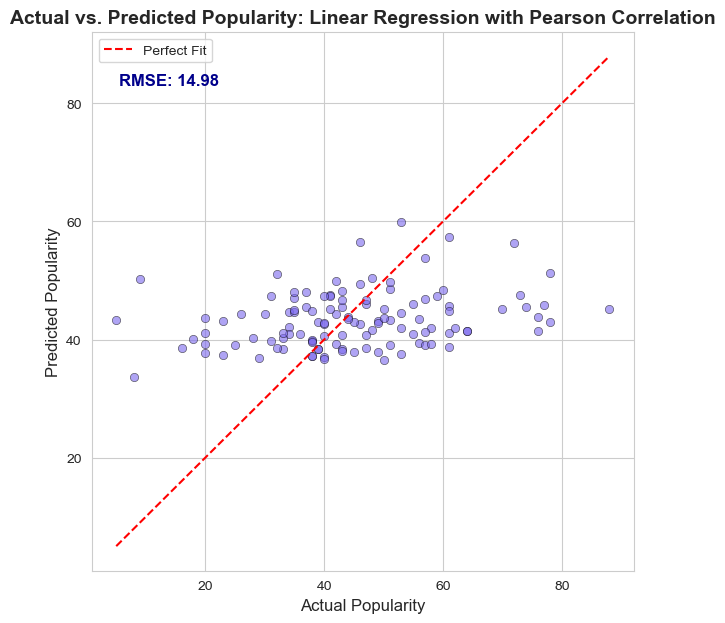

       RMSE:       R2:
0  18.603875 -0.436105


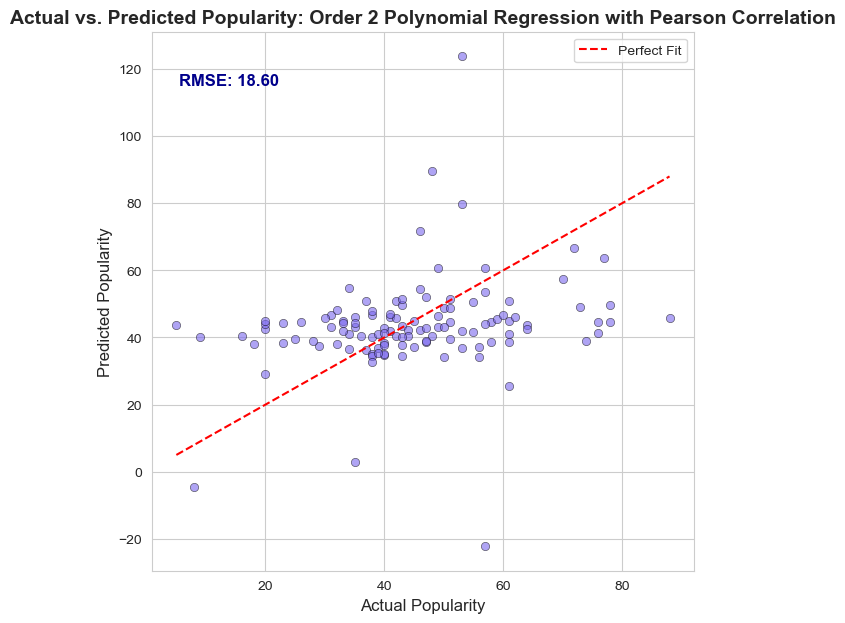

       RMSE:       R2:
0  13.988288  0.188089


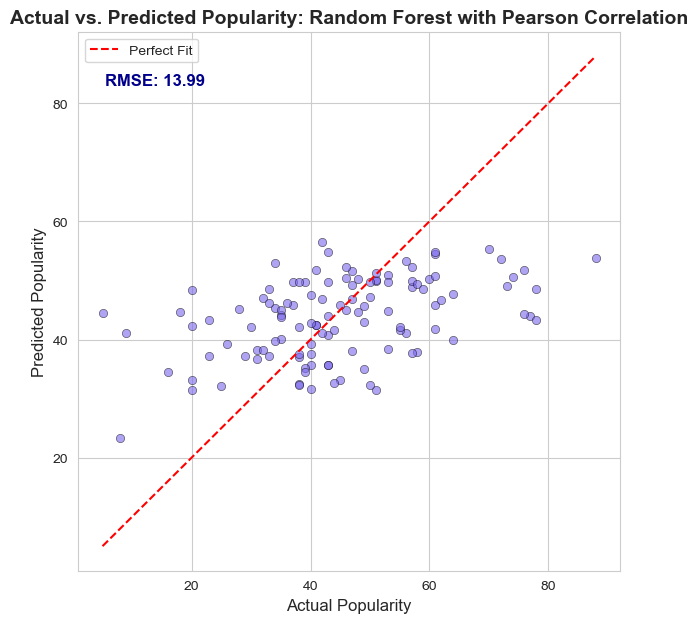

Evaluating with Spearman correlation
Top 10 Features for Spearman Popularity Correlation:
n_words        0.255066
positive       0.229733
n_sentences    0.225435
MEL_88         0.193615
MEL_86         0.193033
MEL_87         0.182722
MEL_85         0.181764
MEL_84         0.179792
MFCC_13        0.178947
MEL_83         0.177761
dtype: float64


C:\Users\Owner\Documents\UCSD\143-Proj\ece143_project\EDA.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


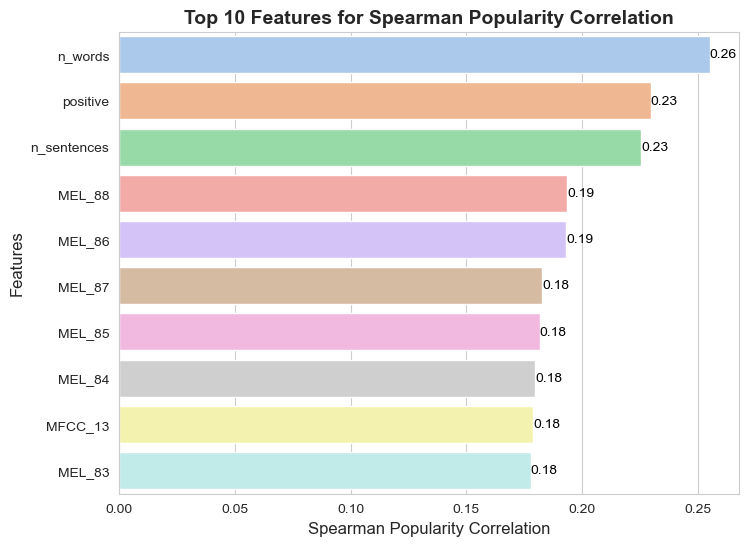

       RMSE:       R2:
0  14.907695  0.077852


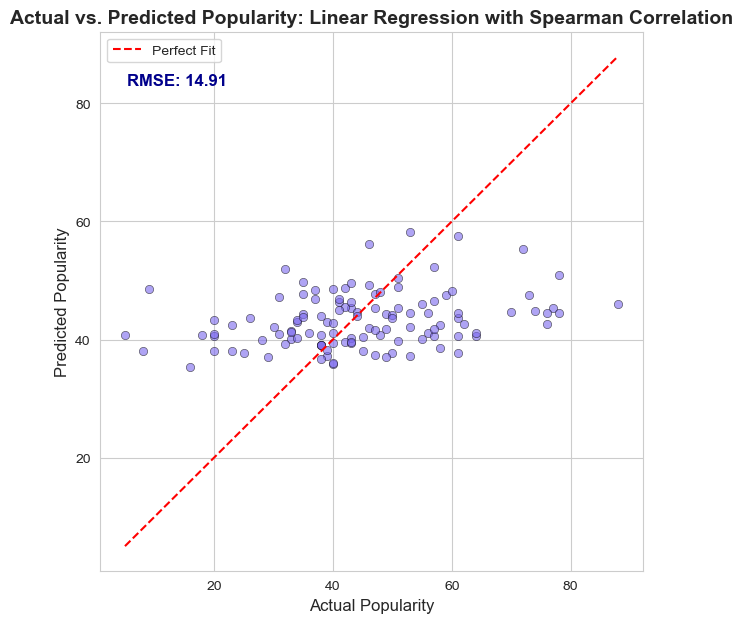

       RMSE:       R2:
0  19.922027 -0.646821


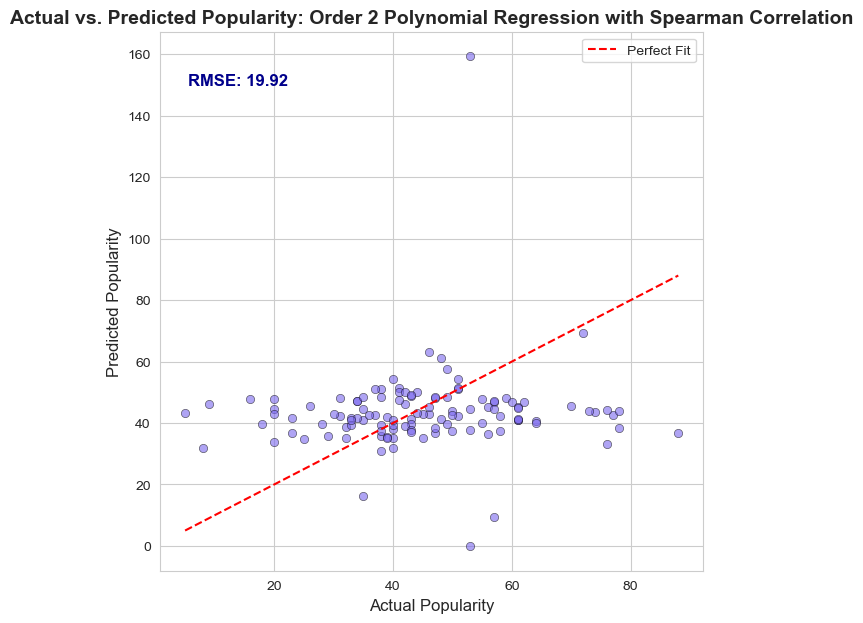

       RMSE:       R2:
0  14.034674  0.182695


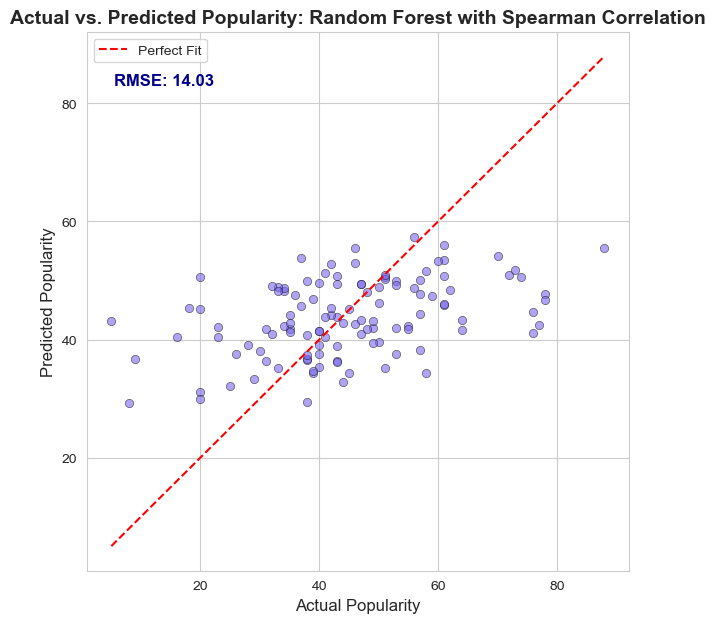

In [7]:
evaluate_cluster(all_data, 'country', 'Country Songs')

### Folk Music

Cluster: Folk Songs
Evaluating with Pearson correlation
Top 10 Features for Pearson Popularity Correlation:
MEL_5                   0.154803
spectral_rollOff_min    0.151185
entropy_energy          0.145064
MEL_7                   0.144012
MEL_8                   0.136622
speechiness             0.136103
MEL_10                  0.135890
MEL_9                   0.134200
MFCC_6                  0.133225
MEL_6                   0.132620
dtype: float64


C:\Users\Owner\Documents\UCSD\143-Proj\ece143_project\EDA.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


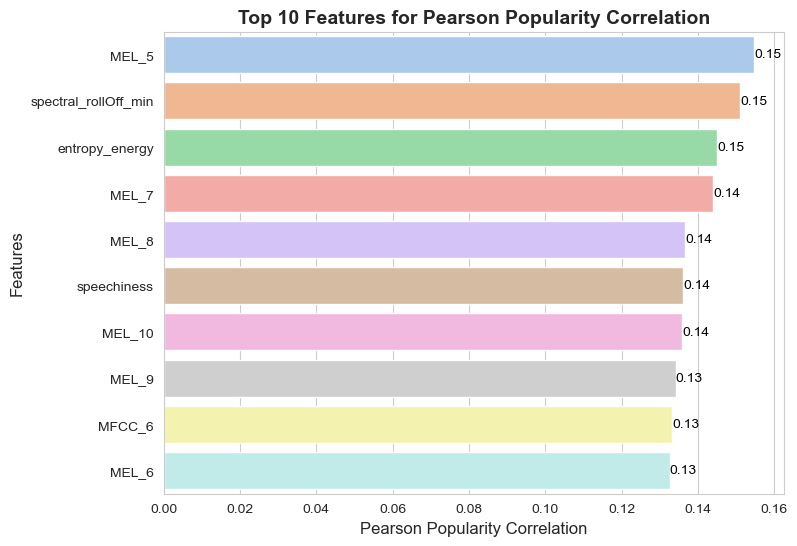

       RMSE:       R2:
0  13.653255  0.053525


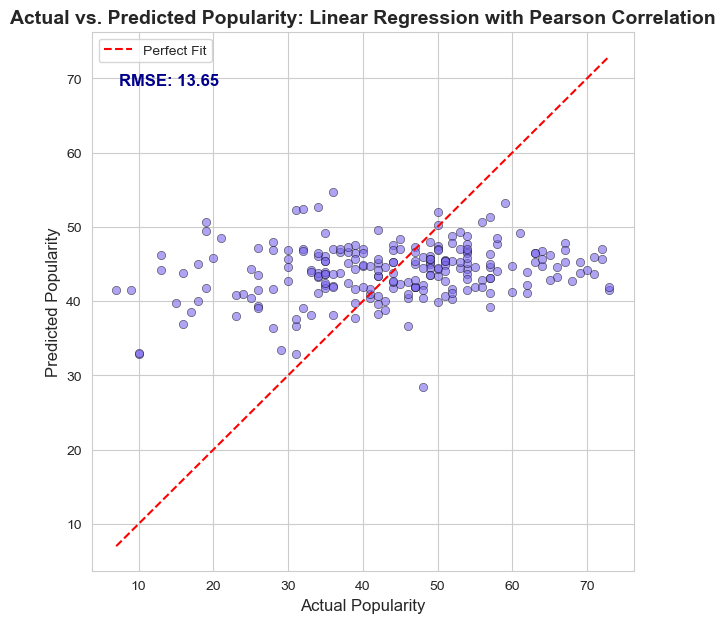

       RMSE:      R2:
0  13.811134  0.03151


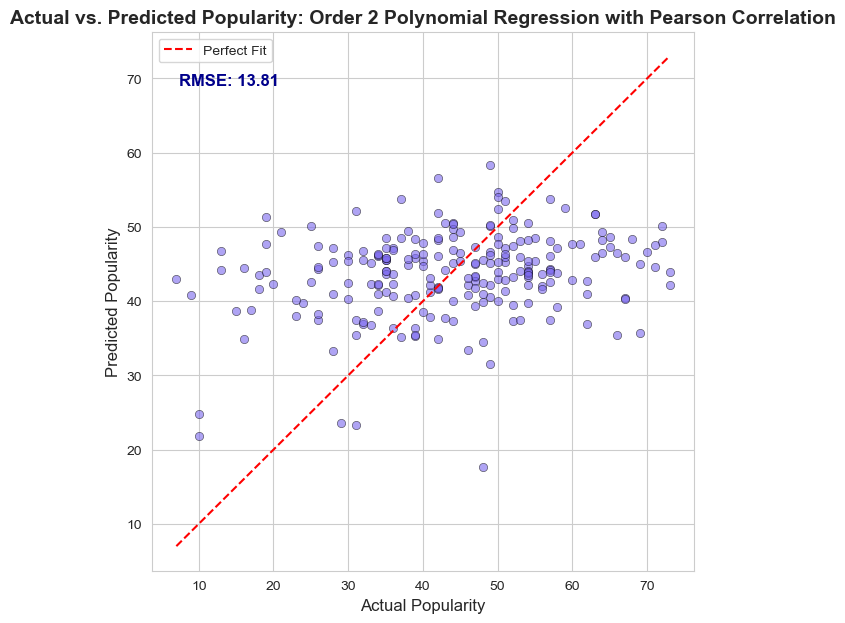

      RMSE:       R2:
0  13.91009  0.017581


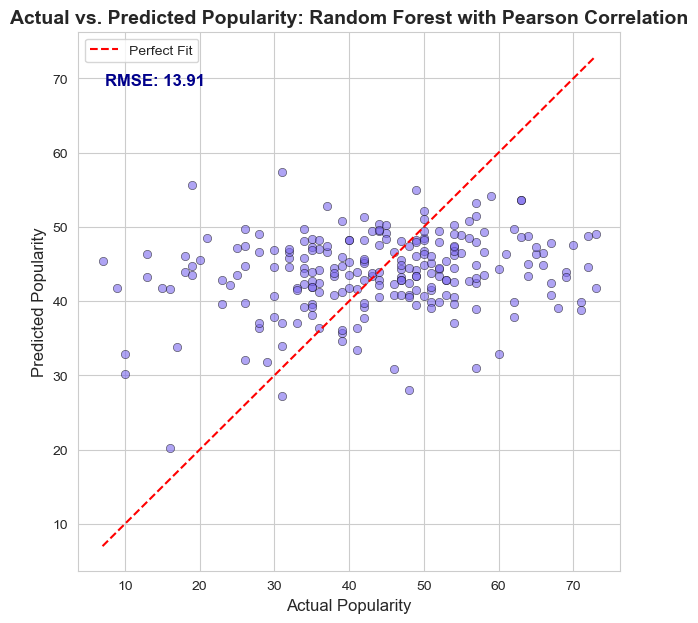

Evaluating with Spearman correlation
Top 10 Features for Spearman Popularity Correlation:
MEL_9         0.192762
MEL_5         0.183294
MEL_8         0.179952
MEL_6         0.172270
MEL_10        0.168472
MEL_7         0.166839
trust         0.161603
norm_trust    0.151871
positive      0.150822
MEL_2         0.150505
dtype: float64


C:\Users\Owner\Documents\UCSD\143-Proj\ece143_project\EDA.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


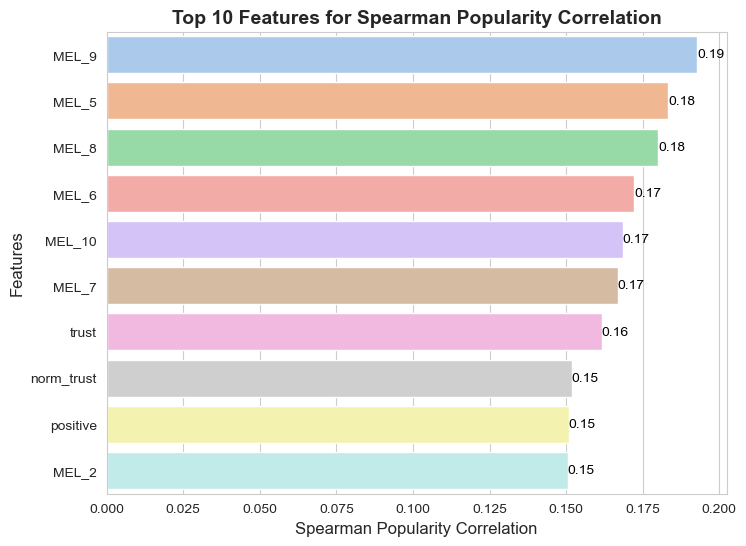

       RMSE:       R2:
0  19.656603 -0.961795


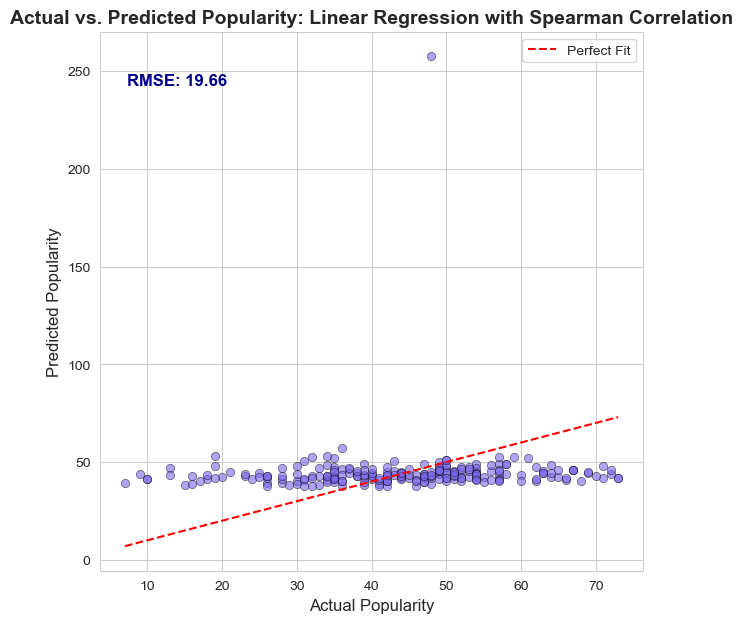

         RMSE:         R2:
0  1323.022441 -8886.32589


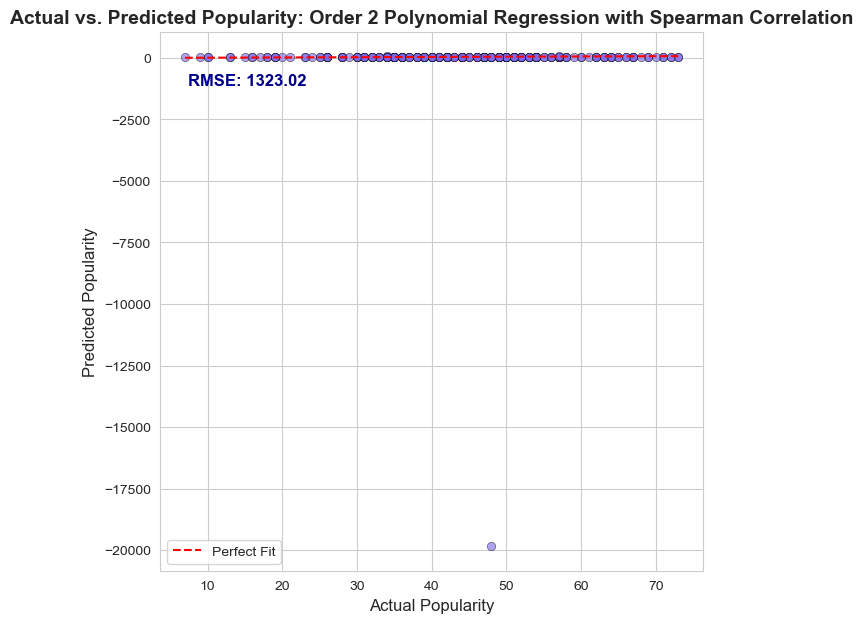

       RMSE:       R2:
0  13.428147  0.084478


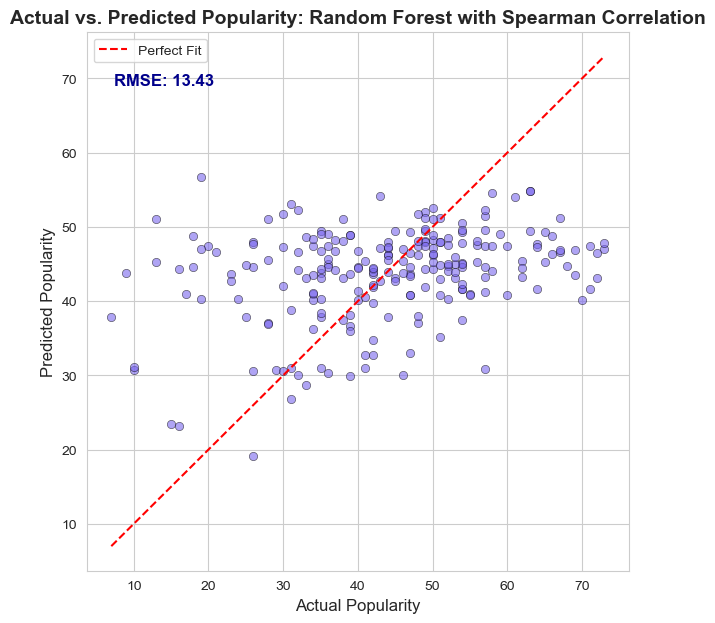

In [8]:
evaluate_cluster(all_data, 'folk', 'Folk Songs')

### Indie Music

Cluster: Indie Songs
Evaluating with Pearson correlation
Top 10 Features for Pearson Popularity Correlation:
entropy_energy    0.181393
n_sentences       0.157908
n_words           0.155809
positive          0.150732
norm_positive     0.142470
trust             0.138216
MFCC_3            0.137318
joy               0.135035
danceability      0.133258
norm_trust        0.131681
dtype: float64


C:\Users\Owner\Documents\UCSD\143-Proj\ece143_project\EDA.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


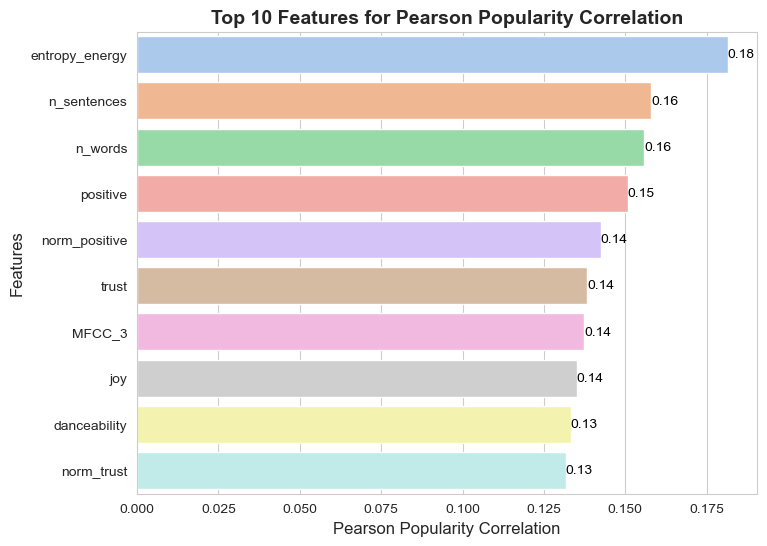

       RMSE:       R2:
0  13.630038  0.077714


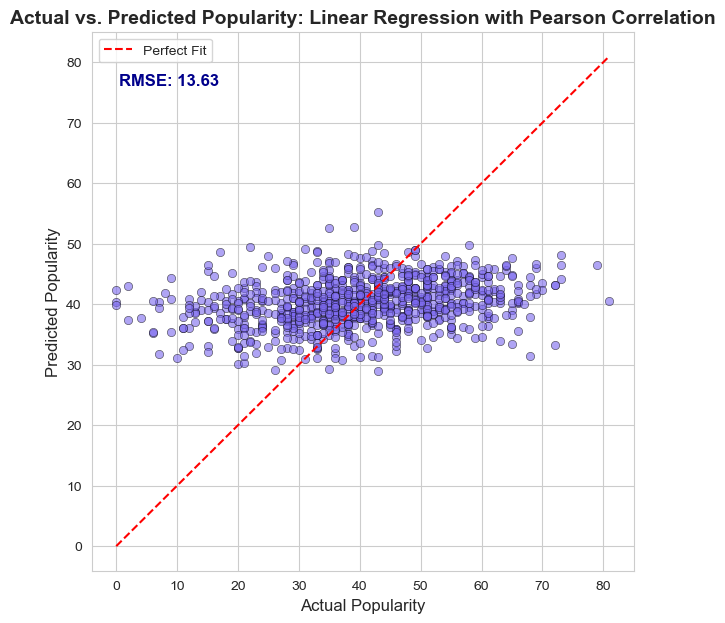

       RMSE:       R2:
0  13.694746  0.068936


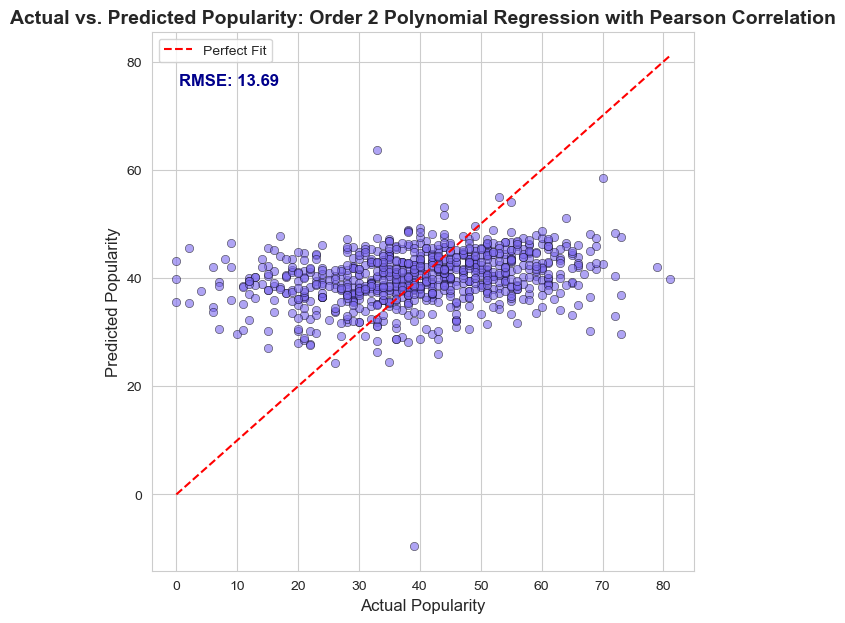

      RMSE:      R2:
0  13.68383  0.07042


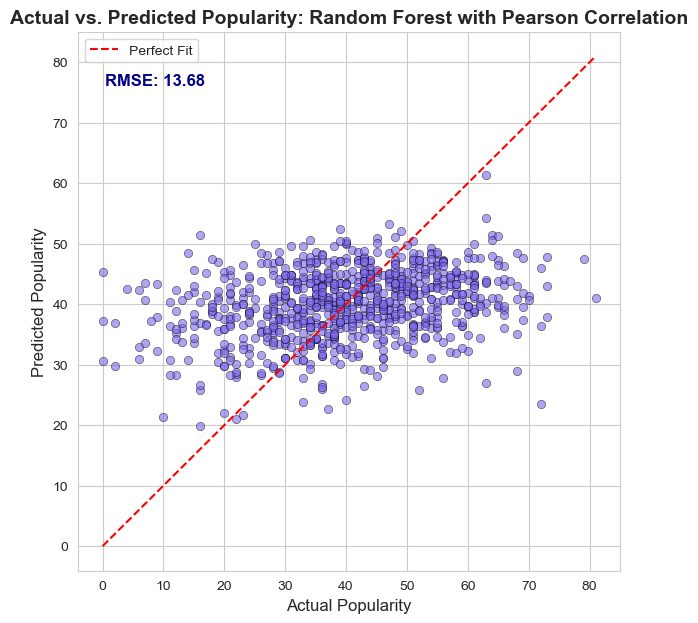

Evaluating with Spearman correlation
Top 10 Features for Spearman Popularity Correlation:
trust               0.198367
positive            0.196330
joy                 0.195471
entropy_energy      0.190647
instrumentalness    0.181967
norm_trust          0.180573
norm_joy            0.180430
anticipation        0.177281
norm_positive       0.176398
n_words             0.175806
dtype: float64


C:\Users\Owner\Documents\UCSD\143-Proj\ece143_project\EDA.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


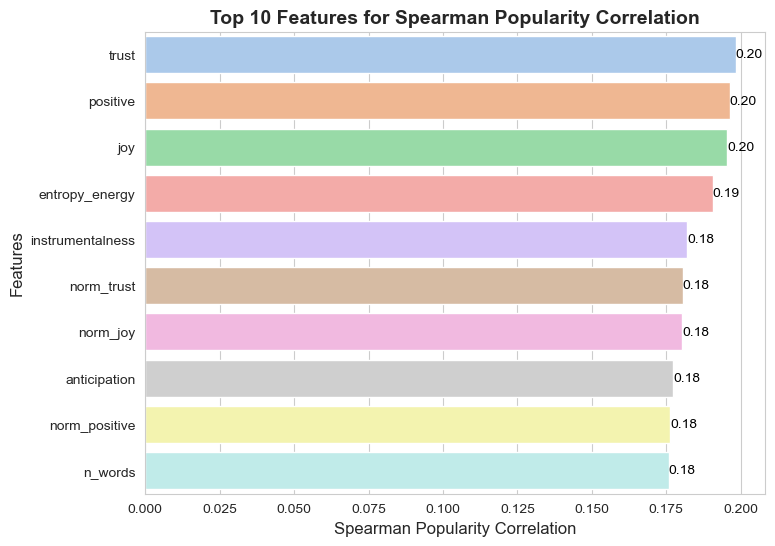

       RMSE:       R2:
0  13.652712  0.074643


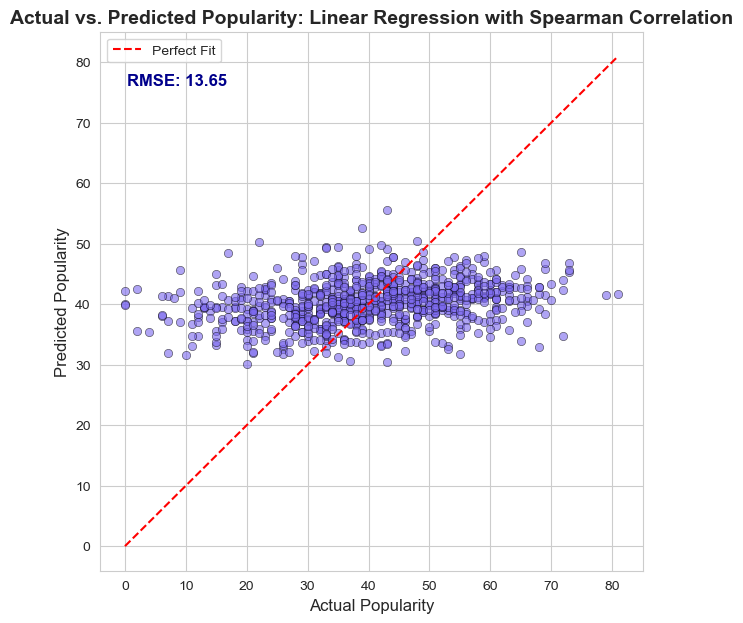

       RMSE:       R2:
0  13.753373  0.060948


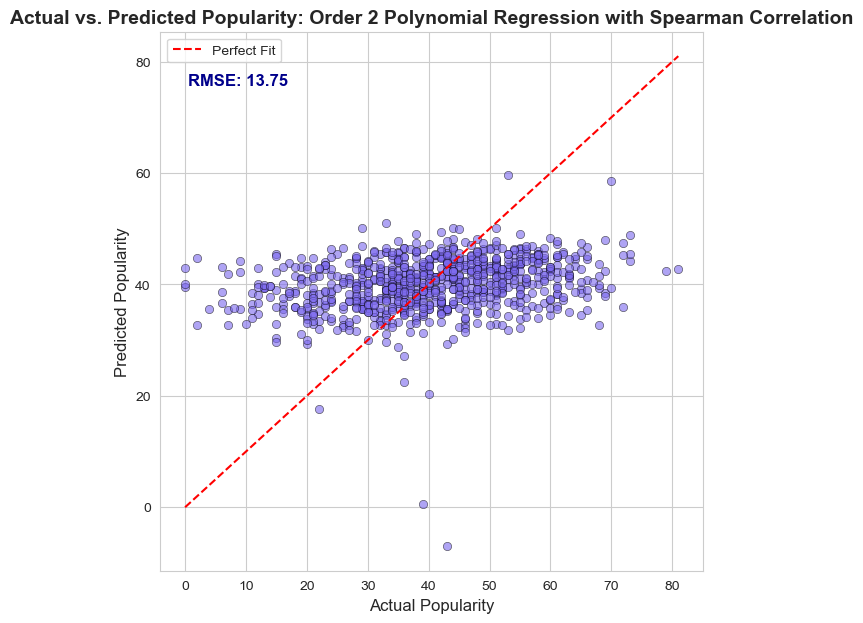

       RMSE:       R2:
0  13.700541  0.068148


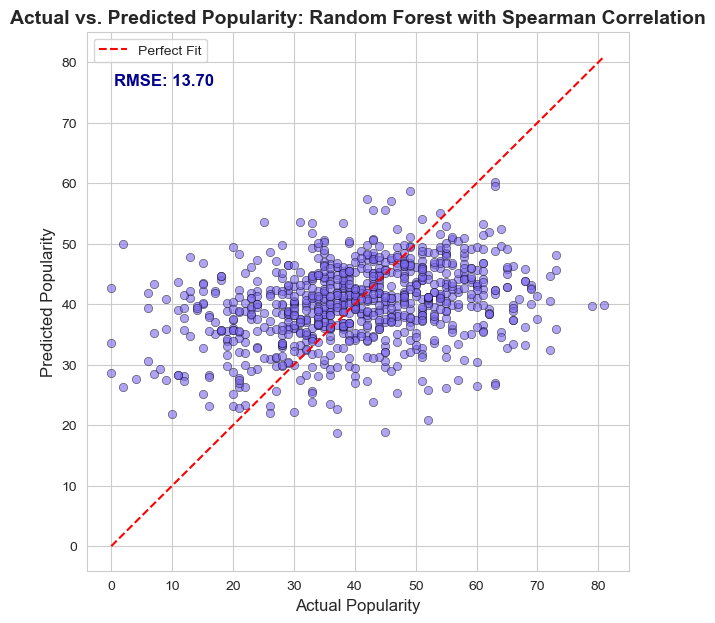

In [9]:
evaluate_cluster(all_data, 'indie', 'Indie Songs')

### Sentiment Features Analysis

In [10]:
def evaluate_sentiment_cluster(data : pd.DataFrame, cluster : str, group_name : str):
    """
    Evaluates cluster performance using only sentiment features for prediction.
    
    Parameters:
        data (DataFrame): Full dataset
        cluster (str): Keyword to filter genres (None for all data)
        group_name (str): Name to display for this group/cluster
    """
    # Define sentiment features
    sentiment_features = [
        'negative', 'disgust', 'fear', 'sadness', 'positive', 'anger', 
        'trust', 'anticipation', 'joy', 'surprise'
    ]
    available_sentiment_features = [col for col in sentiment_features if col in data.columns]

    if cluster is not None:
        df = EDA.get_genre_subset(data, cluster)
    else:
        df = data
    # Keep only sentiment features plus popularity
    df_sentiment = df[available_sentiment_features + ['popularity']].dropna()
    
    print(f'Cluster: {group_name} (Sentiment Features Only)')
    print(f'Number of tracks: {len(df_sentiment)}')
    print(f'Number of features: {len(available_sentiment_features)}')
    pearson, spearman = EDA.report_correlation(df_sentiment, 'popularity')

    for correlation_name, correlation in [("Pearson", pearson), ("Spearman", spearman)]:
        print(f'Evaluating with {correlation_name} correlation')
        
        top_10_features = EDA.plot_top_ten_features(correlation, f'{correlation_name} Popularity')

Cluster: All Songs (Sentiment Features Only)
Number of tracks: 45992
Number of features: 10
Evaluating with Pearson correlation
Top 10 Features for Pearson Popularity Correlation:
anticipation    0.079491
trust           0.077855
fear            0.076082
positive        0.074419
disgust         0.074338
joy             0.072971
negative        0.072103
anger           0.071837
sadness         0.070175
surprise        0.065165
dtype: float64


C:\Users\Owner\Documents\UCSD\143-Proj\ece143_project\EDA.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


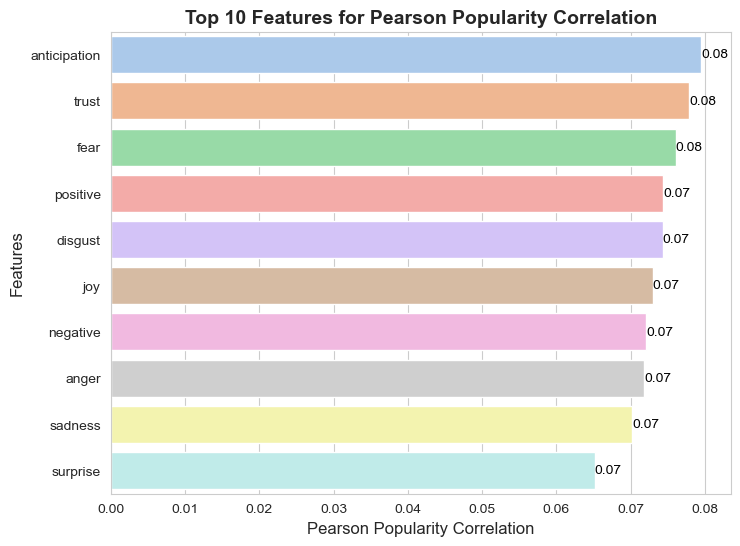

C:\Users\Owner\Documents\UCSD\143-Proj\ece143_project\EDA.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


Evaluating with Spearman correlation
Top 10 Features for Spearman Popularity Correlation:
positive        0.079157
trust           0.073033
negative        0.069104
joy             0.068122
sadness         0.067729
fear            0.061194
surprise        0.049158
disgust         0.047292
anger           0.047162
anticipation    0.046729
dtype: float64


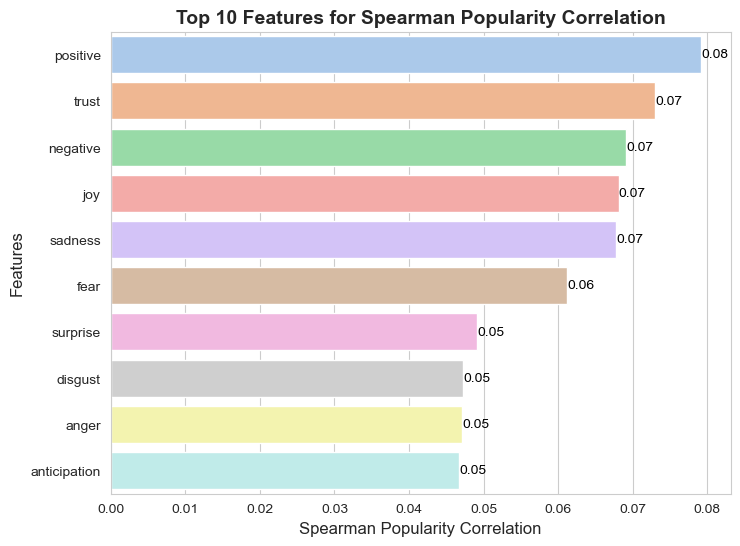

Cluster: Hip Hop Songs (Sentiment Features Only)
Number of tracks: 2631
Number of features: 10
Evaluating with Pearson correlation
Top 10 Features for Pearson Popularity Correlation:
anger           0.058706
disgust         0.056449
fear            0.051350
negative        0.049650
sadness         0.040071
joy             0.026807
surprise        0.025446
anticipation    0.010669
positive        0.009743
trust           0.002029
dtype: float64


C:\Users\Owner\Documents\UCSD\143-Proj\ece143_project\EDA.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


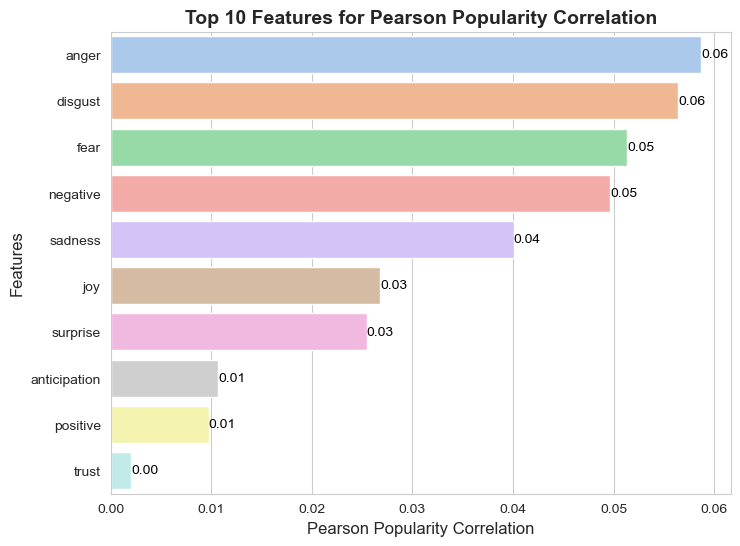

Evaluating with Spearman correlation
Top 10 Features for Spearman Popularity Correlation:
fear            0.097967
negative        0.088701
disgust         0.075074
sadness         0.072960
anger           0.052924
joy             0.034998
positive        0.032268
surprise        0.019941
anticipation    0.014444
trust           0.001216
dtype: float64


C:\Users\Owner\Documents\UCSD\143-Proj\ece143_project\EDA.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


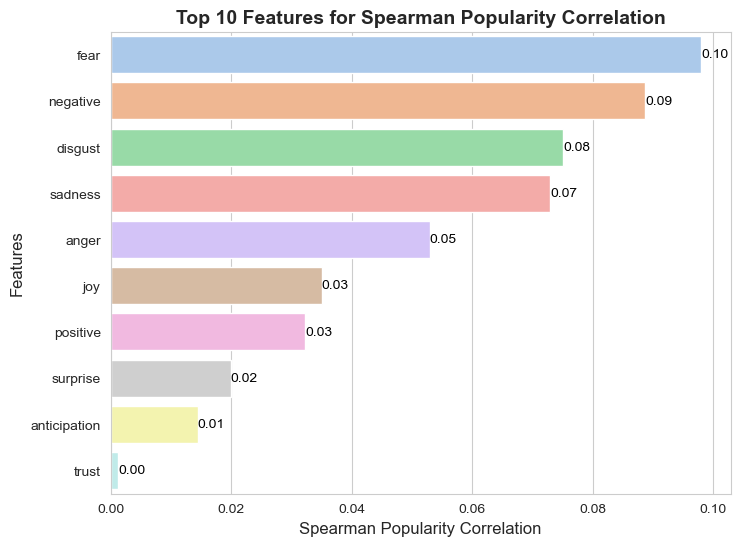

Cluster: Rock Songs (Sentiment Features Only)
Number of tracks: 4130
Number of features: 10
Evaluating with Pearson correlation
Top 10 Features for Pearson Popularity Correlation:
surprise        0.035939
sadness         0.024265
joy             0.016922
negative        0.014688
anticipation    0.010910
positive        0.008577
disgust         0.006673
anger           0.004859
fear            0.003869
trust           0.003716
dtype: float64


C:\Users\Owner\Documents\UCSD\143-Proj\ece143_project\EDA.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


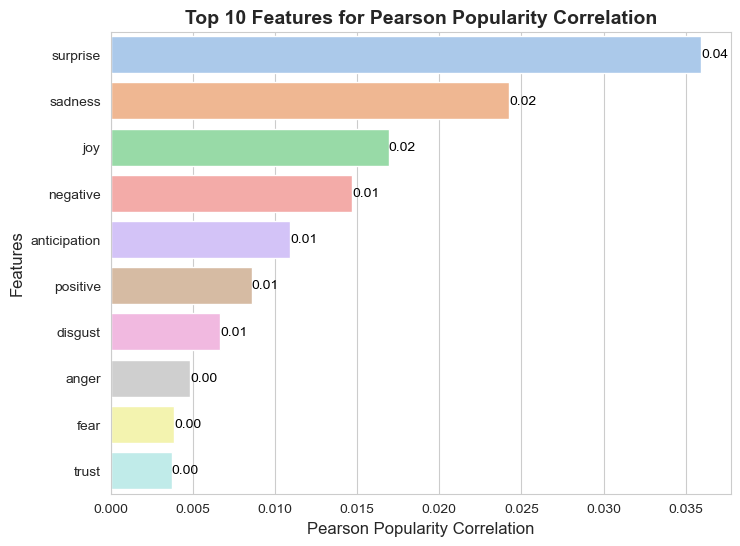

Evaluating with Spearman correlation
Top 10 Features for Spearman Popularity Correlation:
anticipation    0.159614
trust           0.156066
joy             0.154489
positive        0.154025
sadness         0.142764
negative        0.141229
fear            0.138503
surprise        0.129154
disgust         0.120127
anger           0.103264
dtype: float64


C:\Users\Owner\Documents\UCSD\143-Proj\ece143_project\EDA.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


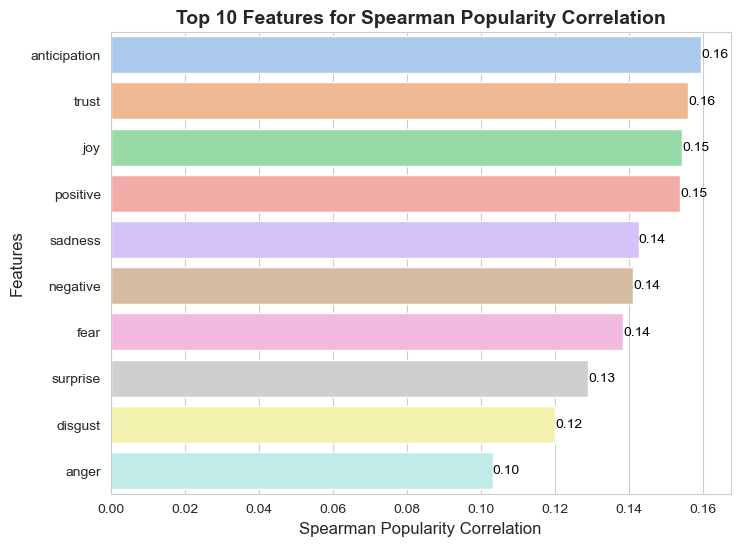

In [11]:
evaluate_sentiment_cluster(all_data, None, 'All Songs')
evaluate_sentiment_cluster(all_data, 'hip hop', 'Hip Hop Songs')
evaluate_sentiment_cluster(all_data, 'rock', 'Rock Songs')

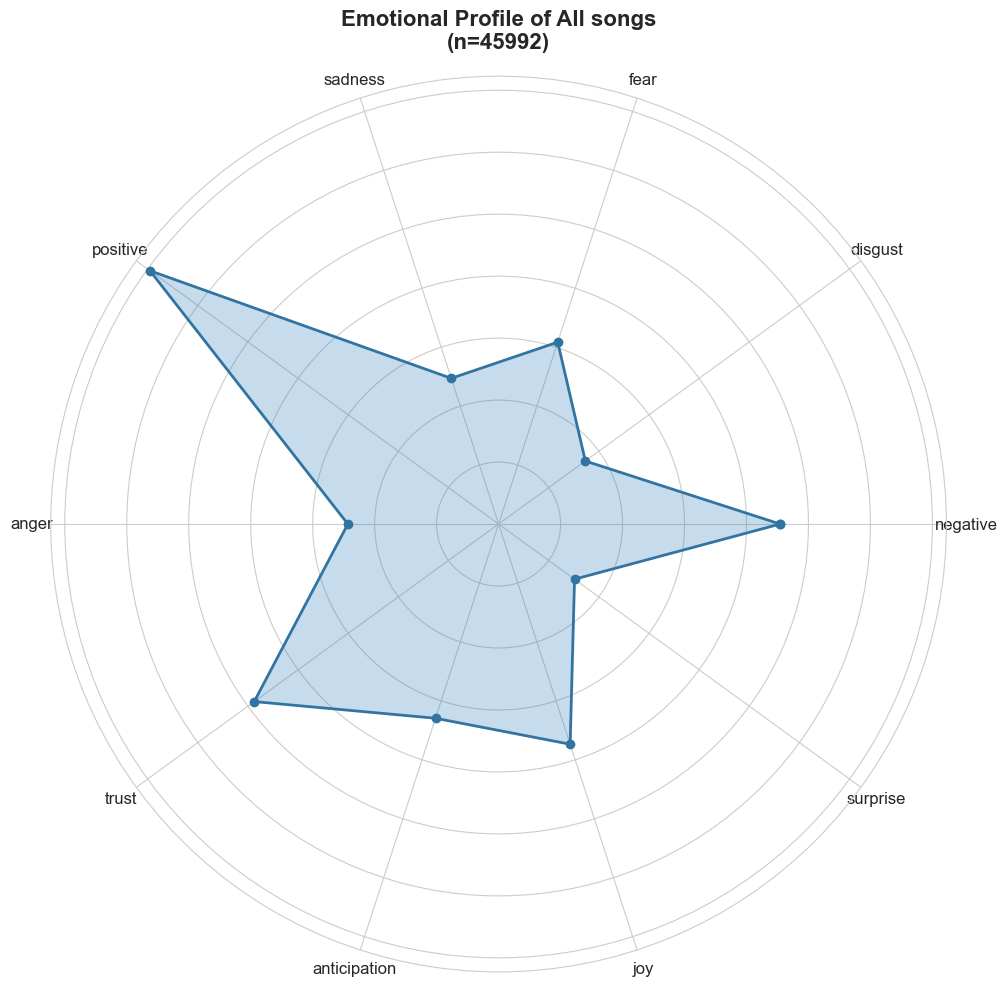

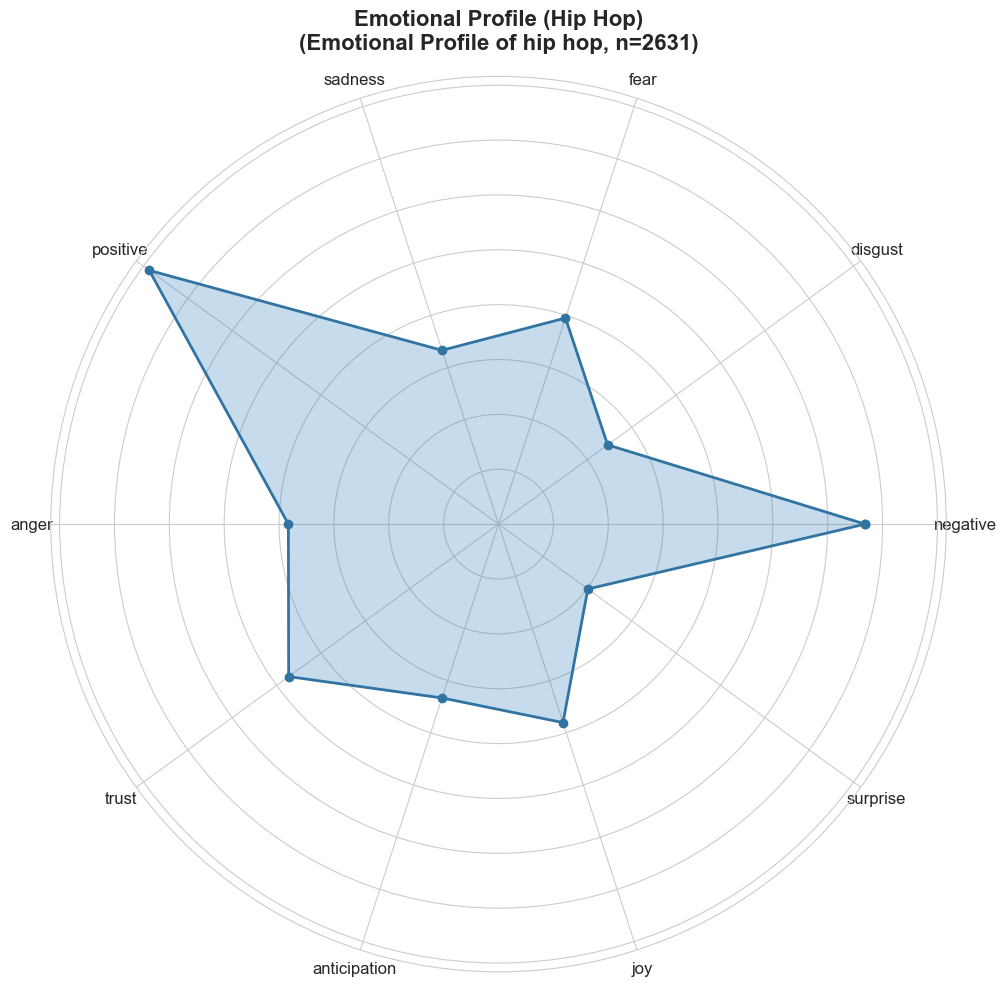

In [12]:
EDA.generate_emotional_profile(all_data, "Emotional Profile of All songs", genre=None)
EDA.generate_emotional_profile(all_data, "Emotional Profile (Hip Hop)", genre="hip hop")